In [1]:
import pandas as pd
import numpy as np

from divexplorer.FP_DivergenceExplorer import FP_DivergenceExplorer
from divexplorer.interactive import selectItemsInteractive


from import_datasets import *
ITEMSETS=["support", "itemsets", "tn", "tp", "fn", "fp"]
ADDIT_DIVER_METRICS=["d_fpr","d_fpr_abs", "d_fnr", "d_fnr_abs", "d_accuracy", "SPsf", "FPsf","FNsf","ACsf"] 
DIVERGENCE_METRICS=["d_fpr", "d_fnr", "d_accuracy"] 
CLASSIFICATION_METRICS=["fpr", "fnr", "accuracy"]
T_VALUES=["t_value_fp", "t_value_fn", "t_value_tp_tn"]
INFOS=ITEMSETS+CLASSIFICATION_METRICS+DIVERGENCE_METRICS+T_VALUES
EFF_LOSS=["effect_size", "log_loss"]
pd.set_option('display.max_colwidth', None)

# Dataset 

In [2]:
abbreviations = {"age_cat":"age", "priors_count":"#prior", "Greater than 45":">45", "25 - 45":"25-45",\
                "African-American":"Afr-Am", "c_charge_degree":"charge", "Less than 25":"<25", "=>":">", "=<":"<",\
                "length_of_stay":"stay", "Caucasian":"Cauc"} 

dataset_name="compas"
risk_class_type=True

Probublica analysis https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm

In [3]:
if dataset_name=="compas":
    dfI, class_map =import_process_compas(risk_class=risk_class_type)
    dfI.reset_index(drop=True, inplace=True)
    display(dfI.head(3))
elif dataset_name=="heart":
    dfI, class_map=import_process_heart()
    display(dfI.head(3))
elif dataset_name=="bank":
    dfI, class_map=import_process_bank()
    display(dfI.head(3))
elif dataset_name=="adult":
    dfI, class_map=import_process_adult()
    display(dfI.head(3))
elif dataset_name=="german":
    dfI, class_map=import_process_german()
    display(dfI.head(3))

,age_cat,c_charge_degree,race,sex,class,priors_count,length_of_stay,predicted
0,Greater than 45,F,Other,Male,0,0,1.0,Medium-Low
1,25 - 45,F,African-American,Male,1,0,10.0,Medium-Low
2,Less than 25,F,African-American,Male,1,4,1.0,Medium-Low


,age_cat,c_charge_degree,race,sex,class,priors_count,length_of_stay,predicted
0,Greater than 45,F,Other,Male,0,0,1.0,Medium-Low
1,25 - 45,F,African-American,Male,1,0,10.0,Medium-Low
2,Less than 25,F,African-American,Male,1,4,1.0,Medium-Low


In [4]:
class_map

{'N': 0, 'P': 1}

{'N': 0, 'P': 1}

In [5]:
print(f"Number of instances: {len(dfI)}, number of features: {len(dfI.columns)-1}")

Number of instances: 6172, number of features: 7
Number of instances: 6172, number of features: 7


In [6]:
dfI["predicted"]= dfI['predicted'].replace({"Medium-Low":0, "High":1})

In [7]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(dfI["class"], dfI["predicted"]))

Accuracy:  0.6339922229423202
Accuracy:  0.6339922229423202


In [8]:
attributes=dfI.columns.drop(["class", "predicted"])
X_FP=dfI[attributes]
y_FP=dfI[["class"]]
y_predict_prob=None
y_predicted=np.asarray(dfI["predicted"])

In [9]:
X_FP=dfI[attributes].copy()
X_discretized=discretize(dfI, attributes=attributes, dataset_name=dataset_name)

print("X_discretized")
display(X_discretized.head())

X_discretized
X_discretized


,age_cat,c_charge_degree,race,sex,priors_count,length_of_stay
0,Greater than 45,F,Other,Male,0,<week
1,25 - 45,F,African-American,Male,0,1w-3M
2,Less than 25,F,African-American,Male,>3,<week
3,25 - 45,M,Other,Male,0,<week
4,25 - 45,F,Caucasian,Male,>3,<week


,age_cat,c_charge_degree,race,sex,priors_count,length_of_stay
0,Greater than 45,F,Other,Male,0,<week
1,25 - 45,F,African-American,Male,0,1w-3M
2,Less than 25,F,African-American,Male,>3,<week
3,25 - 45,M,Other,Male,0,<week
4,25 - 45,F,Caucasian,Male,>3,<week


In [10]:
X_discretized["class"]=y_FP["class"]
X_discretized["predicted"]=y_predicted

# Extract divergence

In [11]:
min_sup=0.1

fp_diver=FP_DivergenceExplorer(X_discretized, true_class_name = "class", predicted_class_name = "predicted", class_map=class_map, dataset_name=dataset_name)
FP_fm=fp_diver.getFrequentPatternDivergence(min_support=min_sup)

In [12]:
print(f"Number of frequent patterns: {len(FP_fm)}")

Number of frequent patterns: 155
Number of frequent patterns: 155


In [13]:
FP_fm.sort_values("support", ascending=False)[["support_count"]+INFOS].head(5)

,support_count,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy,t_value_fp,t_value_fn,t_value_tp_tn
0,6172.0,1.000000,(),3066.0,847.0,1962.0,297.0,0.088314,0.698469,0.633992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4997.0,0.809624,(sex=Male),2357.0,749.0,1647.0,244.0,0.093810,0.687396,0.621573,0.005496,-0.011074,-0.012419,0.738697,0.864525,1.350598
2,4769.0,0.772683,(length_of_stay=<week),2589.0,492.0,1487.0,201.0,0.072043,0.751390,0.646047,-0.016271,0.052920,0.012055,2.339352,4.059364,1.301787
3,3970.0,0.643227,(c_charge_degree=F),1772.0,677.0,1307.0,214.0,0.107754,0.658770,0.616877,0.019440,-0.039699,-0.017116,2.301183,2.896145,1.738770
4,3791.0,0.614226,"(length_of_stay=<week, sex=Male)",1959.0,434.0,1236.0,162.0,0.076379,0.740120,0.631232,-0.011935,0.041651,-0.002760,1.555571,3.011311,0.280104


,support_count,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy,t_value_fp,t_value_fn,t_value_tp_tn
0,6172.0,1.000000,(),3066.0,847.0,1962.0,297.0,0.088314,0.698469,0.633992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4997.0,0.809624,(sex=Male),2357.0,749.0,1647.0,244.0,0.093810,0.687396,0.621573,0.005496,-0.011074,-0.012419,0.738697,0.864525,1.350598
2,4769.0,0.772683,(length_of_stay=<week),2589.0,492.0,1487.0,201.0,0.072043,0.751390,0.646047,-0.016271,0.052920,0.012055,2.339352,4.059364,1.301787
3,3970.0,0.643227,(c_charge_degree=F),1772.0,677.0,1307.0,214.0,0.107754,0.658770,0.616877,0.019440,-0.039699,-0.017116,2.301183,2.896145,1.738770
4,3791.0,0.614226,"(length_of_stay=<week, sex=Male)",1959.0,434.0,1236.0,162.0,0.076379,0.740120,0.631232,-0.011935,0.041651,-0.002760,1.555571,3.011311,0.280104


# Divergence

In [14]:
saveFig=False
outDirShap="./results/figures/shap"
outDirLattice="./results/figures/lattice"

if saveFig:
    createDir(outDirShap)
    createDir(outDirLattice)

In [15]:
from divexplorer.FP_Divergence import FP_Divergence,abbreviateDict

## FPR

In [16]:
fp_divergence_fpr=FP_Divergence(FP_fm, "d_fpr")

In [17]:
fp_divergence_fpr.getInfoItemset(frozenset())[ITEMSETS+CLASSIFICATION_METRICS]

,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy
0,1.0,(),3066.0,847.0,1962.0,297.0,0.088314,0.698469,0.633992


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy
0,1.0,(),3066.0,847.0,1962.0,297.0,0.088314,0.698469,0.633992


### Top FPR

In [18]:
fp_divergence_fpr.getDivergence(th_redundancy=0)[ITEMSETS+DIVERGENCE_METRICS].head(10)

,support,itemsets,tn,tp,fn,fp,d_fpr,d_fnr,d_accuracy
112,0.128645,"(sex=Male, race=African-American, age_cat=25 - 45, priors_count=>3)",155.0,302.0,268.0,69.0,0.219722,-0.228294,-0.058425
92,0.145010,"(race=African-American, age_cat=25 - 45, priors_count=>3)",185.0,333.0,298.0,79.0,0.210928,-0.226203,-0.055221
135,0.109527,"(c_charge_degree=F, race=African-American, age_cat=25 - 45, priors_count=>3)",137.0,264.0,219.0,56.0,0.201841,-0.245053,-0.040797
109,0.130752,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=>3)",166.0,312.0,268.0,61.0,0.180408,-0.236400,-0.041675
67,0.175308,"(sex=Male, race=African-American, priors_count=>3)",239.0,387.0,369.0,87.0,0.178557,-0.210374,-0.055434
55,0.196695,"(race=African-American, priors_count=>3)",283.0,428.0,403.0,100.0,0.172783,-0.213511,-0.048325
87,0.148412,"(c_charge_degree=F, race=African-American, priors_count=>3)",203.0,346.0,296.0,71.0,0.170810,-0.237410,-0.034647
105,0.133668,"(c_charge_degree=F, sex=Male, age_cat=25 - 45, priors_count=>3)",178.0,296.0,289.0,62.0,0.170019,-0.204452,-0.059447
82,0.155865,"(c_charge_degree=F, age_cat=25 - 45, priors_count=>3)",215.0,332.0,341.0,74.0,0.167741,-0.191783,-0.065385
62,0.180655,"(sex=Male, age_cat=25 - 45, priors_count=>3)",254.0,370.0,405.0,86.0,0.164627,-0.175889,-0.074351


,support,itemsets,tn,tp,fn,fp,d_fpr,d_fnr,d_accuracy
112,0.128645,"(sex=Male, race=African-American, age_cat=25 - 45, priors_count=>3)",155.0,302.0,268.0,69.0,0.219722,-0.228294,-0.058425
92,0.145010,"(race=African-American, age_cat=25 - 45, priors_count=>3)",185.0,333.0,298.0,79.0,0.210928,-0.226203,-0.055221
135,0.109527,"(c_charge_degree=F, race=African-American, age_cat=25 - 45, priors_count=>3)",137.0,264.0,219.0,56.0,0.201841,-0.245053,-0.040797
109,0.130752,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=>3)",166.0,312.0,268.0,61.0,0.180408,-0.236400,-0.041675
67,0.175308,"(sex=Male, race=African-American, priors_count=>3)",239.0,387.0,369.0,87.0,0.178557,-0.210374,-0.055434
55,0.196695,"(race=African-American, priors_count=>3)",283.0,428.0,403.0,100.0,0.172783,-0.213511,-0.048325
87,0.148412,"(c_charge_degree=F, race=African-American, priors_count=>3)",203.0,346.0,296.0,71.0,0.170810,-0.237410,-0.034647
105,0.133668,"(c_charge_degree=F, sex=Male, age_cat=25 - 45, priors_count=>3)",178.0,296.0,289.0,62.0,0.170019,-0.204452,-0.059447
82,0.155865,"(c_charge_degree=F, age_cat=25 - 45, priors_count=>3)",215.0,332.0,341.0,74.0,0.167741,-0.191783,-0.065385
62,0.180655,"(sex=Male, age_cat=25 - 45, priors_count=>3)",254.0,370.0,405.0,86.0,0.164627,-0.175889,-0.074351


Top FPR - Only divergence info

In [19]:
fp_divergence_fpr.getDivergence(th_redundancy=0)[["support", "itemsets",  fp_divergence_fpr.metric, fp_divergence_fpr.t_value_col]].head(5)

,support,itemsets,d_fpr,t_value_fp
112,0.128645,"(sex=Male, race=African-American, age_cat=25 - 45, priors_count=>3)",0.219722,7.116857
92,0.145010,"(race=African-American, age_cat=25 - 45, priors_count=>3)",0.210928,7.448260
135,0.109527,"(c_charge_degree=F, race=African-American, age_cat=25 - 45, priors_count=>3)",0.201841,6.201585
109,0.130752,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=>3)",0.180408,6.132988
67,0.175308,"(sex=Male, race=African-American, priors_count=>3)",0.178557,7.214382


,support,itemsets,d_fpr,t_value_fp
112,0.128645,"(sex=Male, race=African-American, age_cat=25 - 45, priors_count=>3)",0.219722,7.116857
92,0.145010,"(race=African-American, age_cat=25 - 45, priors_count=>3)",0.210928,7.448260
135,0.109527,"(c_charge_degree=F, race=African-American, age_cat=25 - 45, priors_count=>3)",0.201841,6.201585
109,0.130752,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=>3)",0.180408,6.132988
67,0.175308,"(sex=Male, race=African-American, priors_count=>3)",0.178557,7.214382


In [20]:
from utils_print import *

Formatted

In [21]:
div_fpr=fp_divergence_fpr.getDivergence(th_redundancy=0)[["support", "itemsets",  fp_divergence_fpr.metric, fp_divergence_fpr.t_value_col]]
div_pr_fpr=printable(div_fpr.head(3), abbreviations=abbreviations)
display(div_pr_fpr)

,itemsets,sup,d_fpr,t_fp
112,"age=25-45, #prior>3, race=Afr-Am, sex=Male",0.13,0.220,7.1
92,"age=25-45, #prior>3, race=Afr-Am",0.15,0.211,7.4
135,"age=25-45, charge=F, #prior>3, race=Afr-Am",0.11,0.202,6.2


,itemsets,sup,d_fpr,t_fp
112,"age=25-45, #prior>3, race=Afr-Am, sex=Male",0.13,0.220,7.1
92,"age=25-45, #prior>3, race=Afr-Am",0.15,0.211,7.4
135,"age=25-45, charge=F, #prior>3, race=Afr-Am",0.11,0.202,6.2


Threshold on redundancy

In [22]:
div_fpr=fp_divergence_fpr.getDivergence(th_redundancy=0)[["support", "itemsets",  fp_divergence_fpr.metric, fp_divergence_fpr.t_value_col]]
div_pr_fpr=printable(div_fpr.head(3), abbreviations=abbreviations)
print(f"{dataset_name} - #FP: {len(FP_fm)-1} - {fp_divergence_fpr.metric_name}")
display(div_pr_fpr)

compas - #FP: 154 - FPR


,itemsets,sup,d_fpr,t_fp
112,"age=25-45, #prior>3, race=Afr-Am, sex=Male",0.13,0.220,7.1
92,"age=25-45, #prior>3, race=Afr-Am",0.15,0.211,7.4
135,"age=25-45, charge=F, #prior>3, race=Afr-Am",0.11,0.202,6.2


compas - #FP: 154 - FPR


,itemsets,sup,d_fpr,t_fp
112,"age=25-45, #prior>3, race=Afr-Am, sex=Male",0.13,0.220,7.1
92,"age=25-45, #prior>3, race=Afr-Am",0.15,0.211,7.4
135,"age=25-45, charge=F, #prior>3, race=Afr-Am",0.11,0.202,6.2


Printable - threshold on redundancy

In [23]:
th_redundancy=0.05
div_fpr=fp_divergence_fpr.getDivergence(th_redundancy=th_redundancy)[["support", "itemsets",  fp_divergence_fpr.metric, fp_divergence_fpr.t_value_col]]
div_pr_fpr=printable(div_fpr.head(3), abbreviations=abbreviations)
print(f"{dataset_name} - #FP: {len(div_fpr)-1} - {fp_divergence_fpr.metric_name} - th_redundancy: {th_redundancy}")
display(div_pr_fpr)

compas - #FP: 5 - FPR - th_redundancy: 0.05
compas - #FP: 5 - FPR - th_redundancy: 0.05


,itemsets,sup,d_fpr,t_fp
28,#prior>3,0.29,0.131,7.5
44,age<25,0.22,0.089,5.5
65,stay=1w-3M,0.18,0.063,3.7


,itemsets,sup,d_fpr,t_fp
28,#prior>3,0.29,0.131,7.5
44,age<25,0.22,0.089,5.5
65,stay=1w-3M,0.18,0.063,3.7


### Shapley value of TOP-K patterns

In [24]:
fp_divergence_ofI=fp_divergence_fpr
topK_fpr=fp_divergence_ofI.getDivergenceTopK(K=5, th_redundancy=0)
topK_fpr

{frozenset({'age_cat=25 - 45',
            'priors_count=>3',
            'race=African-American',
            'sex=Male'}): 0.21972170893335036,
 frozenset({'age_cat=25 - 45',
            'priors_count=>3',
            'race=African-American'}): 0.2109284188900603,
 frozenset({'age_cat=25 - 45',
            'c_charge_degree=F',
            'priors_count=>3',
            'race=African-American'}): 0.2018414350621438,
 frozenset({'c_charge_degree=F',
            'priors_count=>3',
            'race=African-American',
            'sex=Male'}): 0.18040846160798846,
 frozenset({'priors_count=>3',
            'race=African-American',
            'sex=Male'}): 0.17855716029180785}

{frozenset({'age_cat=25 - 45',
            'priors_count=>3',
            'race=African-American',
            'sex=Male'}): 0.21972170893335036,
 frozenset({'age_cat=25 - 45',
            'priors_count=>3',
            'race=African-American'}): 0.2109284188900603,
 frozenset({'age_cat=25 - 45',
            'c_charge_degree=F',
            'priors_count=>3',
            'race=African-American'}): 0.2018414350621438,
 frozenset({'c_charge_degree=F',
            'priors_count=>3',
            'race=African-American',
            'sex=Male'}): 0.18040846160798846,
 frozenset({'priors_count=>3',
            'race=African-American',
            'sex=Male'}): 0.17855716029180785}

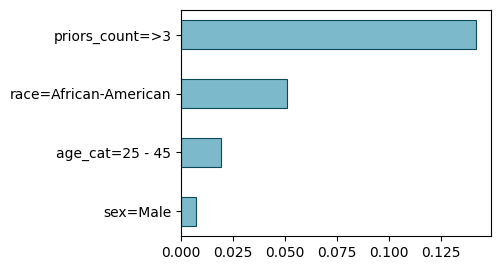

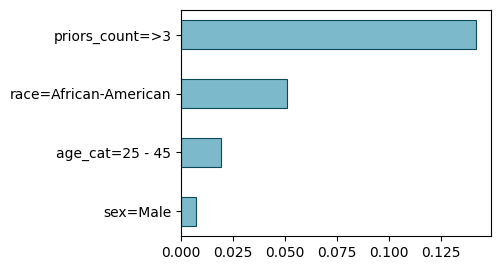

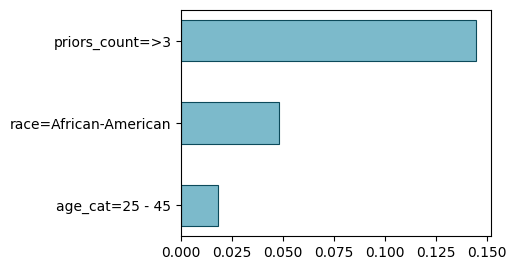

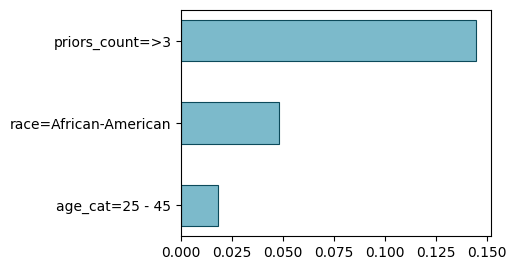

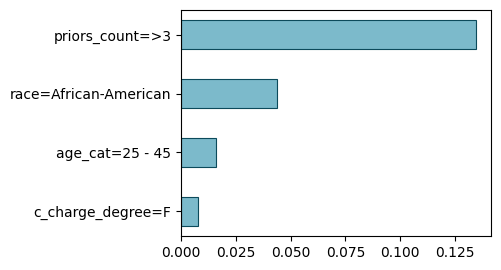

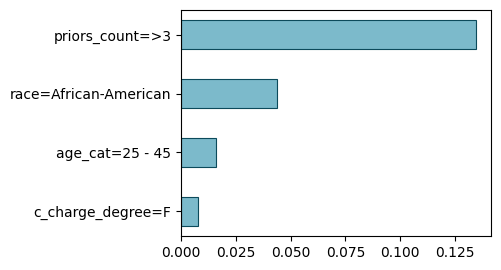

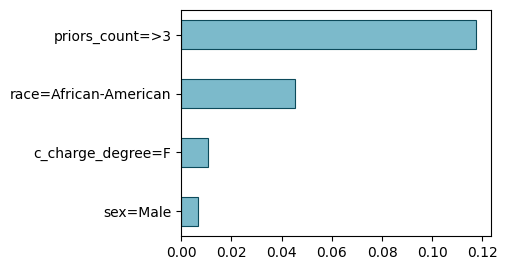

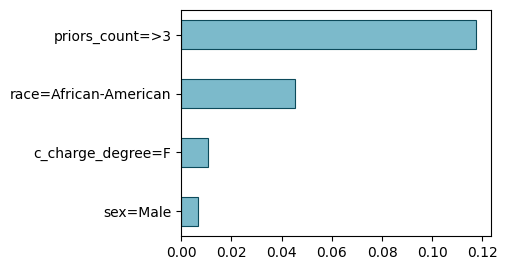

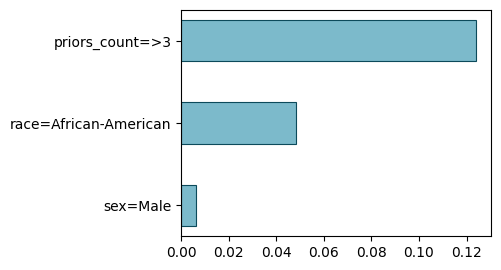

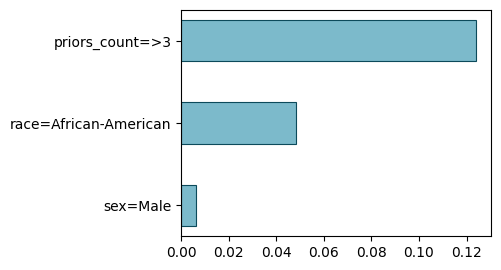

In [25]:
fp_divergence_ofI=fp_divergence_fpr
topK_fpr=fp_divergence_ofI.getDivergenceTopK(K=5, th_redundancy=0)
for item in topK_fpr.keys():
    fp_divergence_ofI.plotShapleyValue(item)

{frozenset({'sex=Male', 'race=African-American', 'age_cat=25 - 45', 'priors_count=>3'}): 0.21972170893335036}
{frozenset({'sex=Male'}): 0.007220590601649035, frozenset({'race=African-American'}): 0.05115538154975479, frozenset({'age_cat=25 - 45'}): 0.019084863062973356, frozenset({'priors_count=>3'}): 0.14226087371897317}
{frozenset({'sex=Male', 'race=African-American', 'age_cat=25 - 45', 'priors_count=>3'}): 0.21972170893335036}
{frozenset({'sex=Male'}): 0.007220590601649035, frozenset({'race=African-American'}): 0.05115538154975479, frozenset({'age_cat=25 - 45'}): 0.019084863062973356, frozenset({'priors_count=>3'}): 0.14226087371897317}


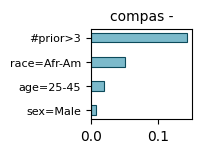

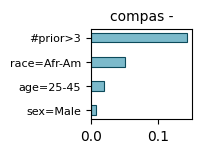

In [26]:
outputName=f"{outDirShap}/{dataset_name}_shap_{fp_divergence_fpr.metric_name}_{min_sup}"
itemset_div=fp_divergence_fpr.getDivergenceTopK(K=1, th_redundancy=0)
print(itemset_div)
itemset_shap=fp_divergence_fpr.computeShapleyValue(list(itemset_div.keys())[0])
print(itemset_shap)
fp_divergence_fpr.plotShapleyValue(shapley_values=itemset_shap, abbreviations=abbreviations,\
                 height=0.4,\
                 title=f"{dataset_name} -", sizeFig=(1.3,1.2), labelsize=8, saveFig=False, nameFig=outputName)

#### Lattice Explorer

In [27]:
top1=list(fp_divergence_fpr.getDivergenceTopK(K=1, th_redundancy=0).keys())[0]
fig1=fp_divergence_fpr.plotLatticeItemset(top1, Th_divergence=0.15, sizeDot="small", getLower=True)

### Corrective

Given an itemset $I$ and an item $i \not\in I$, we say that $i$ is a *corrective item* for $I$ if 
$|\Delta(I \cup i)|<|\Delta(I)|$.


The *corrective factor* of $i$ w.r.t.\ $I$ is 
$|\Delta(I)| - |\Delta(I \cup i)|$.

In [28]:
#Significant corrective items based on t-value of difference
corrSign=fp_divergence_fpr.getCorrectiveItems()
corrSign.head(5)

,item i,S,S+i,v_i,v_S,v_S+i,t_value_corr,corr_factor
291,(priors_count=0),"(sex=Male, race=African-American)","(sex=Male, race=African-American, priors_count=0)",-0.039927,0.062371,0.009430,2.823776,0.052941
97,(priors_count=0),(race=African-American),"(race=African-American, priors_count=0)",-0.039927,0.051052,-0.000500,3.376132,0.050552
260,(race=African-American),"(length_of_stay=<week, priors_count=0)","(length_of_stay=<week, race=African-American, priors_count=0)",0.051052,-0.043788,-0.003043,3.070673,0.040746
96,(race=African-American),(priors_count=0),"(race=African-American, priors_count=0)",0.051052,-0.039927,-0.000500,3.035485,0.039427
378,"(priors_count=[1,3])","(length_of_stay=<week, race=African-American, sex=Male)","(length_of_stay=<week, race=African-American, sex=Male, priors_count=[1,3])",-0.015258,0.037486,-0.001609,2.005249,0.035877


,item i,S,S+i,v_i,v_S,v_S+i,t_value_corr,corr_factor
291,(priors_count=0),"(sex=Male, race=African-American)","(sex=Male, race=African-American, priors_count=0)",-0.039927,0.062371,0.009430,2.823776,0.052941
97,(priors_count=0),(race=African-American),"(race=African-American, priors_count=0)",-0.039927,0.051052,-0.000500,3.376132,0.050552
260,(race=African-American),"(length_of_stay=<week, priors_count=0)","(length_of_stay=<week, race=African-American, priors_count=0)",0.051052,-0.043788,-0.003043,3.070673,0.040746
96,(race=African-American),(priors_count=0),"(race=African-American, priors_count=0)",0.051052,-0.039927,-0.000500,3.035485,0.039427
378,"(priors_count=[1,3])","(length_of_stay=<week, race=African-American, sex=Male)","(length_of_stay=<week, race=African-American, sex=Male, priors_count=[1,3])",-0.015258,0.037486,-0.001609,2.005249,0.035877


In [29]:
corrSign=fp_divergence_fpr.getCorrectiveItems()
corrSignPrint=printableCorrective(corrSign, fp_divergence_fpr.metric_name, abbreviations=abbreviations)   
display(corrSignPrint)

,corrective item α,I,FPR(I),FPR(I U α),corr_factor,t_corr
291,#prior=0,"race=Afr-Am, sex=Male",0.062,0.009,0.053,2.8
97,#prior=0,race=Afr-Am,0.051,-0.001,0.051,3.4
260,race=Afr-Am,"stay<week, #prior=0",-0.044,-0.003,0.041,3.1
96,race=Afr-Am,#prior=0,-0.040,-0.001,0.039,3.0
378,"#prior=[1,3]","stay<week, race=Afr-Am, sex=Male",0.037,-0.002,0.036,2.0


,corrective item α,I,FPR(I),FPR(I U α),corr_factor,t_corr
291,#prior=0,"race=Afr-Am, sex=Male",0.062,0.009,0.053,2.8
97,#prior=0,race=Afr-Am,0.051,-0.001,0.051,3.4
260,race=Afr-Am,"stay<week, #prior=0",-0.044,-0.003,0.041,3.1
96,race=Afr-Am,#prior=0,-0.040,-0.001,0.039,3.0
378,"#prior=[1,3]","stay<week, race=Afr-Am, sex=Male",0.037,-0.002,0.036,2.0


Details of $S$ and $S \cup i$ for the top corrective items

In [30]:
d=fp_divergence_fpr.getCorrectiveItems()
itemsetsOfI=d[["S", "S+i"]].head(4).values
for S,S_i in itemsetsOfI:
    display(fp_divergence_fpr.getInfoItemsets([S,S_i])[ITEMSETS+CLASSIFICATION_METRICS+DIVERGENCE_METRICS])

,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
11,0.425470,"(sex=Male, race=African-American)",992.0,571.0,887.0,176.0,0.150685,0.608368,0.595202,0.062371,-0.090102,-0.038790
144,0.103046,"(sex=Male, race=African-American, priors_count=0)",360.0,53.0,184.0,39.0,0.097744,0.776371,0.649371,0.009430,0.077902,0.015379


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
11,0.425470,"(sex=Male, race=African-American)",992.0,571.0,887.0,176.0,0.150685,0.608368,0.595202,0.062371,-0.090102,-0.038790
144,0.103046,"(sex=Male, race=African-American, priors_count=0)",360.0,53.0,184.0,39.0,0.097744,0.776371,0.649371,0.009430,0.077902,0.015379


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
7,0.514420,(race=African-American),1303.0,634.0,1027.0,211.0,0.139366,0.618302,0.610079,0.051052,-0.080167,-0.023913
100,0.137071,"(race=African-American, priors_count=0)",509.0,61.0,227.0,49.0,0.087814,0.788194,0.673759,-0.000500,0.089725,0.039767


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
7,0.514420,(race=African-American),1303.0,634.0,1027.0,211.0,0.139366,0.618302,0.610079,0.051052,-0.080167,-0.023913
100,0.137071,"(race=African-American, priors_count=0)",509.0,61.0,227.0,49.0,0.087814,0.788194,0.673759,-0.000500,0.089725,0.039767


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
23,0.303143,"(length_of_stay=<week, priors_count=0)",1309.0,67.0,434.0,61.0,0.044526,0.866267,0.735436,-0.043788,0.167798,0.101443
121,0.122975,"(length_of_stay=<week, race=African-American, priors_count=0)",472.0,42.0,201.0,44.0,0.085271,0.827160,0.677207,-0.003043,0.128691,0.043215


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
23,0.303143,"(length_of_stay=<week, priors_count=0)",1309.0,67.0,434.0,61.0,0.044526,0.866267,0.735436,-0.043788,0.167798,0.101443
121,0.122975,"(length_of_stay=<week, race=African-American, priors_count=0)",472.0,42.0,201.0,44.0,0.085271,0.827160,0.677207,-0.003043,0.128691,0.043215


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
20,0.337816,(priors_count=0),1416.0,99.0,498.0,72.0,0.048387,0.834171,0.726619,-0.039927,0.135702,0.092626
100,0.137071,"(race=African-American, priors_count=0)",509.0,61.0,227.0,49.0,0.087814,0.788194,0.673759,-0.000500,0.089725,0.039767


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
20,0.337816,(priors_count=0),1416.0,99.0,498.0,72.0,0.048387,0.834171,0.726619,-0.039927,0.135702,0.092626
100,0.137071,"(race=African-American, priors_count=0)",509.0,61.0,227.0,49.0,0.087814,0.788194,0.673759,-0.000500,0.089725,0.039767


#### Plot Shapley comparison corrective

In [31]:
from divexplorer.shapley_value_FPx import plotComparisonShapleyValues, compareShapleyValues, normalizeMax

,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
11,0.425470,"(sex=Male, race=African-American)",992.0,571.0,887.0,176.0,0.150685,0.608368,0.595202,0.062371,-0.090102,-0.038790
144,0.103046,"(sex=Male, race=African-American, priors_count=0)",360.0,53.0,184.0,39.0,0.097744,0.776371,0.649371,0.009430,0.077902,0.015379


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
11,0.425470,"(sex=Male, race=African-American)",992.0,571.0,887.0,176.0,0.150685,0.608368,0.595202,0.062371,-0.090102,-0.038790
144,0.103046,"(sex=Male, race=African-American, priors_count=0)",360.0,53.0,184.0,39.0,0.097744,0.776371,0.649371,0.009430,0.077902,0.015379


∇FPR(S):0.062 -->  ∇FPR(S U i):0.009
∇FPR(S):0.062 -->  ∇FPR(S U i):0.009


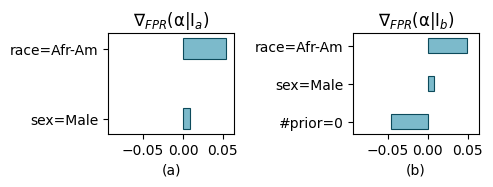

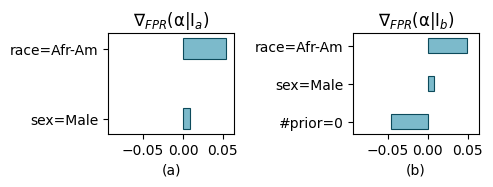

In [32]:
id_col=0
fp_divergence_ofI=fp_divergence_fpr
corrSign=fp_divergence_ofI.getCorrectiveItems()

if len(corrSign)>id_col:
    outputName=f"{outDirShap}/{dataset_name}_shap_corrective_{fp_divergence_ofI.metric_name}_{min_sup}"
    S,S_i, v_S, v_Si=corrSign[["S", "S+i", "v_S", "v_S+i"]].head(id_col+1).values[id_col].tolist()
    display(fp_divergence_ofI.getInfoItemsets([S,S_i])[ITEMSETS+CLASSIFICATION_METRICS+DIVERGENCE_METRICS])
    shap_itemset1=abbreviateDict(fp_divergence_ofI.computeShapleyValue(S), abbreviations)
    shap_itemset2=abbreviateDict(fp_divergence_ofI.computeShapleyValue(S_i), abbreviations)
    id1, id2="$_a$", "$_b$" 
    t1, t2=f"$∇_{{{fp_divergence_ofI.metric_name}}}$(α|I{id1})", f"$∇_{{{fp_divergence_ofI.metric_name}}}$(α|I{id2})"
    print(f"∇{fp_divergence_ofI.metric_name}(S):{round(v_S,3)} -->  ∇{fp_divergence_ofI.metric_name}(S U i):{round(v_Si,3)}")

    plotComparisonShapleyValues(shap_itemset1, shap_itemset2, height=[0.3, 0.4], sharedAxis=True, \
                        sizeFig=(5.2, 1.9), title=[t1,t2], saveFig=False, nameFig=outputName, pad=1.5,\
                               metrics_name=[fp_divergence_ofI.metric_name, fp_divergence_ofI.metric_name])

#### Lattice

In [33]:
id_col=0
fp_divergence_ofI=fp_divergence_fpr
corrSign=fp_divergence_ofI.getCorrectiveItems()
if len(corrSign)>id_col:
    S_i=corrSign[["S+i"]].head(id_col+1).values[id_col][0]
    print(S_i)
    fig1=fp_divergence_ofI.plotLatticeItemset(S_i, Th_divergence=0.15, sizeDot="small", getLower=True)
    if saveFig:
        fig1.write_image(f"{outDirLattice}/lattice_corrective_{dataset_name}_{fp_divergence_ofI.metric_name}_{min_sup}.pdf")

frozenset({'sex=Male', 'race=African-American', 'priors_count=0'})
frozenset({'sex=Male', 'race=African-American', 'priors_count=0'})


## For interactive analysis

In [34]:
selectItemsInteractive(fp_divergence_fpr)

Button(description='Select items', style=ButtonStyle())

Button(description='Select items', style=ButtonStyle())

## FNR

In [35]:
fp_divergence_fnr=FP_Divergence(FP_fm, "d_fnr")

### Top FNR

In [36]:
fp_divergence_fnr.getDivergence(th_redundancy=0)[ITEMSETS+DIVERGENCE_METRICS].head(10)

,support,itemsets,tn,tp,fn,fp,d_fpr,d_fnr,d_accuracy
88,0.148250,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45)",675.0,14.0,201.0,25.0,-0.052600,0.236415,0.119013
146,0.102398,"(length_of_stay=<week, c_charge_degree=M, priors_count=[1,3])",380.0,16.0,219.0,17.0,-0.045493,0.233446,-0.007410
147,0.101750,"(race=Caucasian, age_cat=Greater than 45)",452.0,12.0,158.0,6.0,-0.075214,0.230943,0.104861
142,0.107097,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45, sex=Male)",479.0,12.0,152.0,18.0,-0.052097,0.228360,0.108822
128,0.119086,"(length_of_stay=<week, c_charge_degree=M, race=Caucasian)",504.0,16.0,201.0,14.0,-0.061287,0.227798,0.073491
116,0.127025,"(sex=Male, age_cat=Greater than 45, length_of_stay=<week)",549.0,19.0,202.0,14.0,-0.063447,0.215558,0.090498
76,0.158782,"(length_of_stay=<week, age_cat=Greater than 45)",706.0,23.0,237.0,14.0,-0.068870,0.213069,0.109885
90,0.146630,"(length_of_stay=<week, c_charge_degree=M, priors_count=0)",675.0,19.0,189.0,22.0,-0.056750,0.210185,0.132859
124,0.122165,"(length_of_stay=<week, age_cat=25 - 45, sex=Male, priors_count=[1,3])",433.0,28.0,271.0,22.0,-0.039962,0.207885,-0.022586
152,0.101102,"(length_of_stay=<week, c_charge_degree=M, sex=Male, priors_count=0)",451.0,15.0,144.0,14.0,-0.058206,0.207191,0.112803


,support,itemsets,tn,tp,fn,fp,d_fpr,d_fnr,d_accuracy
88,0.148250,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45)",675.0,14.0,201.0,25.0,-0.052600,0.236415,0.119013
146,0.102398,"(length_of_stay=<week, c_charge_degree=M, priors_count=[1,3])",380.0,16.0,219.0,17.0,-0.045493,0.233446,-0.007410
147,0.101750,"(race=Caucasian, age_cat=Greater than 45)",452.0,12.0,158.0,6.0,-0.075214,0.230943,0.104861
142,0.107097,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45, sex=Male)",479.0,12.0,152.0,18.0,-0.052097,0.228360,0.108822
128,0.119086,"(length_of_stay=<week, c_charge_degree=M, race=Caucasian)",504.0,16.0,201.0,14.0,-0.061287,0.227798,0.073491
116,0.127025,"(sex=Male, age_cat=Greater than 45, length_of_stay=<week)",549.0,19.0,202.0,14.0,-0.063447,0.215558,0.090498
76,0.158782,"(length_of_stay=<week, age_cat=Greater than 45)",706.0,23.0,237.0,14.0,-0.068870,0.213069,0.109885
90,0.146630,"(length_of_stay=<week, c_charge_degree=M, priors_count=0)",675.0,19.0,189.0,22.0,-0.056750,0.210185,0.132859
124,0.122165,"(length_of_stay=<week, age_cat=25 - 45, sex=Male, priors_count=[1,3])",433.0,28.0,271.0,22.0,-0.039962,0.207885,-0.022586
152,0.101102,"(length_of_stay=<week, c_charge_degree=M, sex=Male, priors_count=0)",451.0,15.0,144.0,14.0,-0.058206,0.207191,0.112803


Top FPR - Only divergence info

In [37]:
div_fnr=fp_divergence_fnr.getDivergence(th_redundancy=0)[["support", "itemsets",  fp_divergence_fnr.metric, fp_divergence_fnr.t_value_col]]
div_fnr.head(10)

,support,itemsets,d_fnr,t_value_fn
88,0.148250,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45)",0.236415,12.088217
146,0.102398,"(length_of_stay=<week, c_charge_degree=M, priors_count=[1,3])",0.233446,12.209479
147,0.101750,"(race=Caucasian, age_cat=Greater than 45)",0.230943,10.332685
142,0.107097,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45, sex=Male)",0.228360,9.918399
128,0.119086,"(length_of_stay=<week, c_charge_degree=M, race=Caucasian)",0.227798,11.197136
116,0.127025,"(sex=Male, age_cat=Greater than 45, length_of_stay=<week)",0.215558,10.113018
76,0.158782,"(length_of_stay=<week, age_cat=Greater than 45)",0.213069,10.619408
90,0.146630,"(length_of_stay=<week, c_charge_degree=M, priors_count=0)",0.210185,9.390201
124,0.122165,"(length_of_stay=<week, age_cat=25 - 45, sex=Male, priors_count=[1,3])",0.207885,10.773803
152,0.101102,"(length_of_stay=<week, c_charge_degree=M, sex=Male, priors_count=0)",0.207191,8.076216


,support,itemsets,d_fnr,t_value_fn
88,0.148250,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45)",0.236415,12.088217
146,0.102398,"(length_of_stay=<week, c_charge_degree=M, priors_count=[1,3])",0.233446,12.209479
147,0.101750,"(race=Caucasian, age_cat=Greater than 45)",0.230943,10.332685
142,0.107097,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45, sex=Male)",0.228360,9.918399
128,0.119086,"(length_of_stay=<week, c_charge_degree=M, race=Caucasian)",0.227798,11.197136
116,0.127025,"(sex=Male, age_cat=Greater than 45, length_of_stay=<week)",0.215558,10.113018
76,0.158782,"(length_of_stay=<week, age_cat=Greater than 45)",0.213069,10.619408
90,0.146630,"(length_of_stay=<week, c_charge_degree=M, priors_count=0)",0.210185,9.390201
124,0.122165,"(length_of_stay=<week, age_cat=25 - 45, sex=Male, priors_count=[1,3])",0.207885,10.773803
152,0.101102,"(length_of_stay=<week, c_charge_degree=M, sex=Male, priors_count=0)",0.207191,8.076216


Formatted

In [38]:
div_fnr=fp_divergence_fnr.getDivergence(th_redundancy=0)[["support", "itemsets",  fp_divergence_fnr.metric, fp_divergence_fnr.t_value_col]]
div_pr_fnr=printable(div_fnr.head(5), abbreviations=abbreviations)
print(f"{dataset_name} - #FP {len(FP_fm)-1} - {fp_divergence_fnr.metric_name}")
display(div_pr_fnr)

compas - #FP 154 - FNR
compas - #FP 154 - FNR


,itemsets,sup,d_fnr,t_fn
88,"age=25-45, stay<week, #prior=0",0.15,0.236,12.1
146,"charge=M, stay<week, #prior=[1,3]",0.10,0.233,12.2
147,"age>45, race=Cauc",0.10,0.231,10.3
142,"age=25-45, stay<week, #prior=0, sex=Male",0.11,0.228,9.9
128,"charge=M, stay<week, race=Cauc",0.12,0.228,11.2


,itemsets,sup,d_fnr,t_fn
88,"age=25-45, stay<week, #prior=0",0.15,0.236,12.1
146,"charge=M, stay<week, #prior=[1,3]",0.10,0.233,12.2
147,"age>45, race=Cauc",0.10,0.231,10.3
142,"age=25-45, stay<week, #prior=0, sex=Male",0.11,0.228,9.9
128,"charge=M, stay<week, race=Cauc",0.12,0.228,11.2


Threshold on redundancy

In [39]:
th_redundancy=0.05
div_fnr=fp_divergence_fnr.getDivergence(th_redundancy=th_redundancy)[["support", "itemsets",  fp_divergence_fnr.metric, fp_divergence_fnr.t_value_col]]
div_pr_fnr=printable(div_fnr.head(5), abbreviations=abbreviations)
display(div_pr_fnr.head(5))
print(f"{dataset_name} - #FP {len(div_fnr)-1} - {fp_divergence_fnr.metric_name} - th_redundancy: {th_redundancy}")

,itemsets,sup,d_fnr,t_fn
88,"age=25-45, stay<week, #prior=0",0.15,0.236,12.1
146,"charge=M, stay<week, #prior=[1,3]",0.10,0.233,12.2
147,"age>45, race=Cauc",0.10,0.231,10.3
76,"age>45, stay<week",0.16,0.213,10.6
99,"charge=M, race=Cauc",0.14,0.188,8.8


,itemsets,sup,d_fnr,t_fn
88,"age=25-45, stay<week, #prior=0",0.15,0.236,12.1
146,"charge=M, stay<week, #prior=[1,3]",0.10,0.233,12.2
147,"age>45, race=Cauc",0.10,0.231,10.3
76,"age>45, stay<week",0.16,0.213,10.6
99,"charge=M, race=Cauc",0.14,0.188,8.8


compas - #FP 27 - FNR - th_redundancy: 0.05
compas - #FP 27 - FNR - th_redundancy: 0.05


### Shapley value of TOP-K patterns

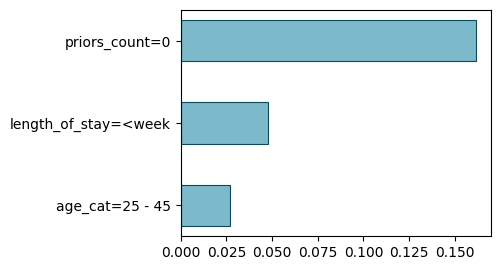

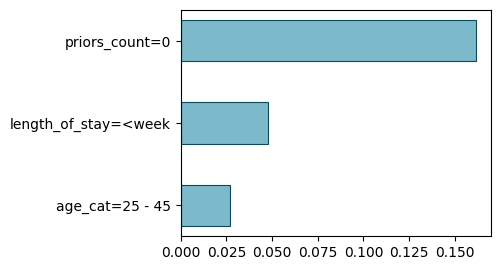

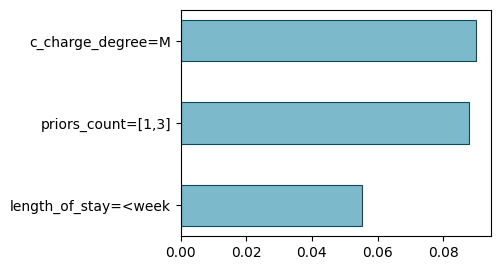

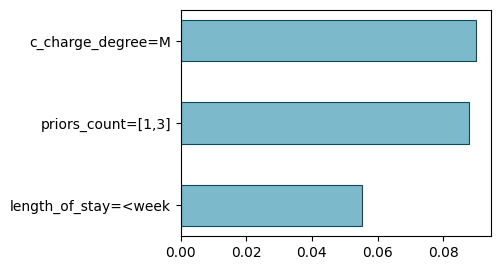

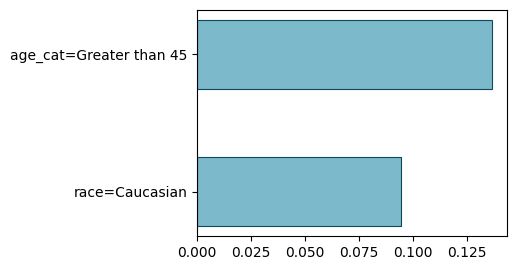

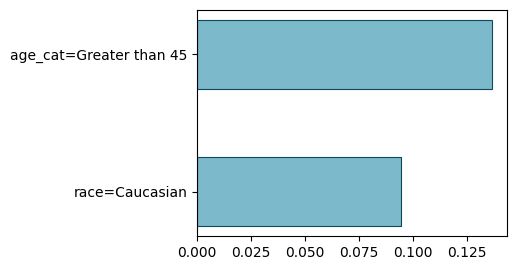

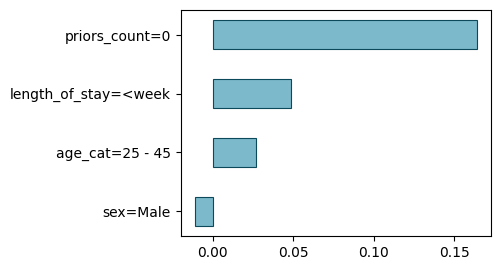

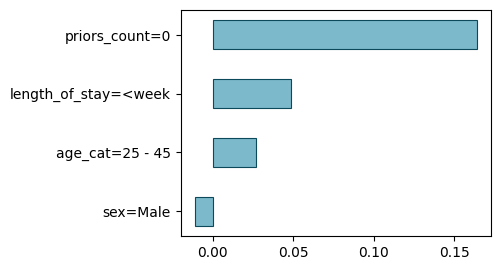

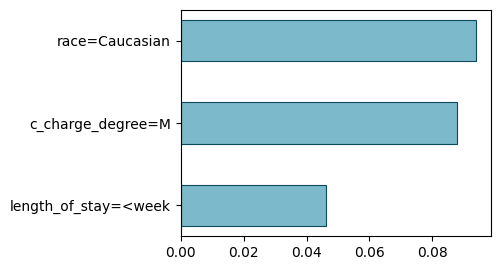

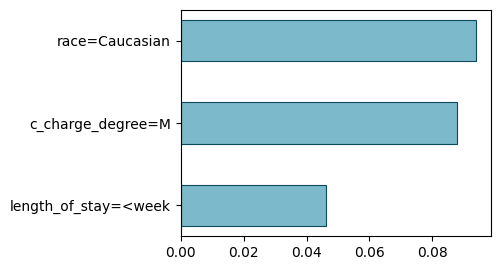

In [40]:
fp_divergence_ofI=fp_divergence_fnr
topK_fnr=fp_divergence_ofI.getDivergenceTopK(K=5, th_redundancy=0)
for item in topK_fnr.keys():
    fp_divergence_ofI.plotShapleyValue(itemset=item)

{frozenset({'length_of_stay=<week', 'priors_count=0', 'age_cat=25 - 45'}): 0.236414514807057}
{frozenset({'length_of_stay=<week', 'priors_count=0', 'age_cat=25 - 45'}): 0.236414514807057}


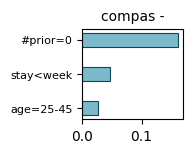

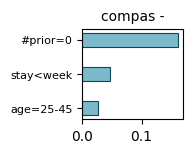

In [41]:
outputName=f"{outDirShap}/{dataset_name}_shap_{fp_divergence_fnr.metric_name}_{min_sup}"
itemset_div=fp_divergence_fnr.getDivergenceTopK(K=1, th_redundancy=0)
print(itemset_div)
itemset_shap=fp_divergence_fnr.computeShapleyValue(list(itemset_div.keys())[0])
fp_divergence_fnr.plotShapleyValue(shapley_values=itemset_shap, abbreviations=abbreviations,\
                 height=0.4,\
                 title=f"{dataset_name} -", sizeFig=(1.3,1.2), labelsize=8, saveFig=saveFig, nameFig=outputName)

#### Lattice Explorer

In [42]:
top1=list(fp_divergence_fnr.getDivergenceTopK(K=1, th_redundancy=0).keys())[0]
fig1=fp_divergence_fnr.plotLatticeItemset(top1, Th_divergence=0.15, sizeDot="small")#, getLower=True)

### Corrective

Given an itemset $I$ and an item $i \not\in I$, we say that $i$ is a *corrective item* for $I$ if 
$|\Delta(I \cup i)|<|\Delta(I)|$.


The *corrective factor* of $i$ w.r.t.\ $I$ is 
$|\Delta(I)| - |\Delta(I \cup i)|$.

In [43]:
#Significant corrective items based on t-value of difference
corrSign=fp_divergence_fnr.getCorrectiveItems()
corrSign.head(10)

,item i,S,S+i,v_i,v_S,v_S+i,t_value_corr,corr_factor
402,"(priors_count=[1,3])","(c_charge_degree=F, sex=Male, race=African-American)","(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",0.093156,-0.122627,-0.010782,3.761896,0.111845
258,"(priors_count=[1,3])","(c_charge_degree=F, race=African-American)","(c_charge_degree=F, race=African-American, priors_count=[1,3])",0.093156,-0.112602,0.004095,4.281193,0.108507
249,(c_charge_degree=M),"(sex=Male, race=African-American)","(race=African-American, sex=Male, c_charge_degree=M)",0.095470,-0.090102,-0.001033,3.331496,0.089068
85,(race=African-American),(c_charge_degree=M),"(c_charge_degree=M, race=African-American)",-0.080167,0.095470,0.008738,3.378966,0.086732
247,(race=African-American),"(sex=Male, c_charge_degree=M)","(race=African-American, sex=Male, c_charge_degree=M)",-0.080167,0.084265,-0.001033,3.056766,0.083231
244,(race=African-American),"(length_of_stay=<week, c_charge_degree=M)","(race=African-American, length_of_stay=<week, c_charge_degree=M)",-0.080167,0.143802,0.065881,2.861090,0.077921
391,(race=African-American),"(length_of_stay=<week, c_charge_degree=M, sex=Male)","(race=African-American, length_of_stay=<week, c_charge_degree=M, sex=Male)",-0.080167,0.129833,0.053279,2.544816,0.076554
302,(length_of_stay=<week),"(age_cat=Less than 25, race=African-American)","(age_cat=Less than 25, length_of_stay=<week, race=African-American)",0.052920,-0.097655,-0.024374,2.199262,0.073280
84,(c_charge_degree=M),(race=African-American),"(c_charge_degree=M, race=African-American)",0.095470,-0.080167,0.008738,3.579722,0.071429
207,"(priors_count=[1,3])","(sex=Male, race=African-American)","(sex=Male, race=African-American, priors_count=[1,3])",0.093156,-0.090102,0.019810,4.468645,0.070291


,item i,S,S+i,v_i,v_S,v_S+i,t_value_corr,corr_factor
402,"(priors_count=[1,3])","(c_charge_degree=F, sex=Male, race=African-American)","(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",0.093156,-0.122627,-0.010782,3.761896,0.111845
258,"(priors_count=[1,3])","(c_charge_degree=F, race=African-American)","(c_charge_degree=F, race=African-American, priors_count=[1,3])",0.093156,-0.112602,0.004095,4.281193,0.108507
249,(c_charge_degree=M),"(sex=Male, race=African-American)","(race=African-American, sex=Male, c_charge_degree=M)",0.095470,-0.090102,-0.001033,3.331496,0.089068
85,(race=African-American),(c_charge_degree=M),"(c_charge_degree=M, race=African-American)",-0.080167,0.095470,0.008738,3.378966,0.086732
247,(race=African-American),"(sex=Male, c_charge_degree=M)","(race=African-American, sex=Male, c_charge_degree=M)",-0.080167,0.084265,-0.001033,3.056766,0.083231
244,(race=African-American),"(length_of_stay=<week, c_charge_degree=M)","(race=African-American, length_of_stay=<week, c_charge_degree=M)",-0.080167,0.143802,0.065881,2.861090,0.077921
391,(race=African-American),"(length_of_stay=<week, c_charge_degree=M, sex=Male)","(race=African-American, length_of_stay=<week, c_charge_degree=M, sex=Male)",-0.080167,0.129833,0.053279,2.544816,0.076554
302,(length_of_stay=<week),"(age_cat=Less than 25, race=African-American)","(age_cat=Less than 25, length_of_stay=<week, race=African-American)",0.052920,-0.097655,-0.024374,2.199262,0.073280
84,(c_charge_degree=M),(race=African-American),"(c_charge_degree=M, race=African-American)",0.095470,-0.080167,0.008738,3.579722,0.071429
207,"(priors_count=[1,3])","(sex=Male, race=African-American)","(sex=Male, race=African-American, priors_count=[1,3])",0.093156,-0.090102,0.019810,4.468645,0.070291


In [44]:
corrSign=fp_divergence_fnr.getCorrectiveItems()
corrSignPrint=printableCorrective(corrSign, fp_divergence_fnr.metric_name, abbreviations=abbreviations)   
display(corrSignPrint)

,corrective item α,I,FNR(I),FNR(I U α),corr_factor,t_corr
402,"#prior=[1,3]","charge=F, race=Afr-Am, sex=Male",-0.123,-0.011,0.112,3.8
258,"#prior=[1,3]","charge=F, race=Afr-Am",-0.113,0.004,0.109,4.3
249,charge=M,"race=Afr-Am, sex=Male",-0.090,-0.001,0.089,3.3
85,race=Afr-Am,charge=M,0.095,0.009,0.087,3.4
247,race=Afr-Am,"charge=M, sex=Male",0.084,-0.001,0.083,3.1


,corrective item α,I,FNR(I),FNR(I U α),corr_factor,t_corr
402,"#prior=[1,3]","charge=F, race=Afr-Am, sex=Male",-0.123,-0.011,0.112,3.8
258,"#prior=[1,3]","charge=F, race=Afr-Am",-0.113,0.004,0.109,4.3
249,charge=M,"race=Afr-Am, sex=Male",-0.090,-0.001,0.089,3.3
85,race=Afr-Am,charge=M,0.095,0.009,0.087,3.4
247,race=Afr-Am,"charge=M, sex=Male",0.084,-0.001,0.083,3.1


Details of $S$ and $S \cup i$ for the top corrective items

In [45]:
d=fp_divergence_fnr.getCorrectiveItems()
itemsetsOfI=d[["S", "S+i"]].head(4).values
for S,S_i in itemsetsOfI:
    display(fp_divergence_fnr.getInfoItemsets([S,S_i])[ITEMSETS+CLASSIFICATION_METRICS+DIVERGENCE_METRICS])

,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
27,0.297472,"(c_charge_degree=F, sex=Male, race=African-American)",641.0,453.0,615.0,127.0,0.165365,0.575843,0.595861,0.077051,-0.122627,-0.038132
153,0.100454,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",249.0,104.0,229.0,38.0,0.132404,0.687688,0.569355,0.044090,-0.010782,-0.064637


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
27,0.297472,"(c_charge_degree=F, sex=Male, race=African-American)",641.0,453.0,615.0,127.0,0.165365,0.575843,0.595861,0.077051,-0.122627,-0.038132
153,0.100454,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",249.0,104.0,229.0,38.0,0.132404,0.687688,0.569355,0.044090,-0.010782,-0.064637


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
17,0.355800,"(c_charge_degree=F, race=African-American)",826.0,504.0,713.0,153.0,0.156282,0.585867,0.605647,0.067968,-0.112602,-0.028346
119,0.123785,"(c_charge_degree=F, race=African-American, priors_count=[1,3])",327.0,116.0,274.0,47.0,0.125668,0.702564,0.579843,0.037354,0.004095,-0.054149


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
17,0.355800,"(c_charge_degree=F, race=African-American)",826.0,504.0,713.0,153.0,0.156282,0.585867,0.605647,0.067968,-0.112602,-0.028346
119,0.123785,"(c_charge_degree=F, race=African-American, priors_count=[1,3])",327.0,116.0,274.0,47.0,0.125668,0.702564,0.579843,0.037354,0.004095,-0.054149


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
11,0.425470,"(sex=Male, race=African-American)",992.0,571.0,887.0,176.0,0.150685,0.608368,0.595202,0.062371,-0.090102,-0.038790
114,0.127997,"(race=African-American, sex=Male, c_charge_degree=M)",351.0,118.0,272.0,49.0,0.122500,0.697436,0.593671,0.034186,-0.001033,-0.040321


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
11,0.425470,"(sex=Male, race=African-American)",992.0,571.0,887.0,176.0,0.150685,0.608368,0.595202,0.062371,-0.090102,-0.038790
114,0.127997,"(race=African-American, sex=Male, c_charge_degree=M)",351.0,118.0,272.0,49.0,0.122500,0.697436,0.593671,0.034186,-0.001033,-0.040321


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
16,0.356773,(c_charge_degree=M),1294.0,170.0,655.0,83.0,0.060276,0.793939,0.66485,-0.028038,0.095470,0.030858
77,0.158620,"(c_charge_degree=M, race=African-American)",477.0,130.0,314.0,58.0,0.108411,0.707207,0.62002,0.020097,0.008738,-0.013972


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
16,0.356773,(c_charge_degree=M),1294.0,170.0,655.0,83.0,0.060276,0.793939,0.66485,-0.028038,0.095470,0.030858
77,0.158620,"(c_charge_degree=M, race=African-American)",477.0,130.0,314.0,58.0,0.108411,0.707207,0.62002,0.020097,0.008738,-0.013972


#### Plot Shapley comparison corrective

In [46]:
fp_divergence_ofI=fp_divergence_fnr
corrSign=fp_divergence_ofI.getCorrectiveItems()
id_col=0
if len(corrSign)>0:
    S,S_i=corrSign[["S", "S+i"]].values[id_col].tolist()
    display(fp_divergence_ofI.getInfoItemsets([S,S_i])[ITEMSETS+CLASSIFICATION_METRICS+DIVERGENCE_METRICS+[fp_divergence_ofI.t_value_col]])

,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy,t_value_fn
27,0.297472,"(c_charge_degree=F, sex=Male, race=African-American)",641.0,453.0,615.0,127.0,0.165365,0.575843,0.595861,0.077051,-0.122627,-0.038132,7.044825
153,0.100454,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",249.0,104.0,229.0,38.0,0.132404,0.687688,0.569355,0.044090,-0.010782,-0.064637,0.439716


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy,t_value_fn
27,0.297472,"(c_charge_degree=F, sex=Male, race=African-American)",641.0,453.0,615.0,127.0,0.165365,0.575843,0.595861,0.077051,-0.122627,-0.038132,7.044825
153,0.100454,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",249.0,104.0,229.0,38.0,0.132404,0.687688,0.569355,0.044090,-0.010782,-0.064637,0.439716


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
27,0.297472,"(c_charge_degree=F, sex=Male, race=African-American)",641.0,453.0,615.0,127.0,0.165365,0.575843,0.595861,0.077051,-0.122627,-0.038132
153,0.100454,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",249.0,104.0,229.0,38.0,0.132404,0.687688,0.569355,0.044090,-0.010782,-0.064637


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
27,0.297472,"(c_charge_degree=F, sex=Male, race=African-American)",641.0,453.0,615.0,127.0,0.165365,0.575843,0.595861,0.077051,-0.122627,-0.038132
153,0.100454,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",249.0,104.0,229.0,38.0,0.132404,0.687688,0.569355,0.044090,-0.010782,-0.064637


∇FNR(S):-0.123 -->  ∇FNR(S U i):-0.011
∇FNR(S):-0.123 -->  ∇FNR(S U i):-0.011


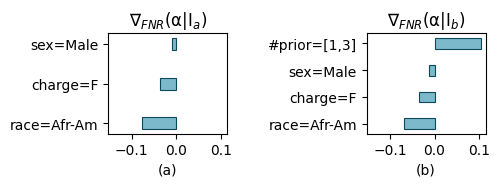

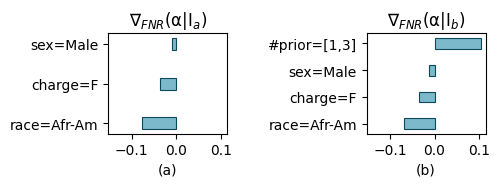

In [47]:
id_col=0

fp_divergence_ofI=fp_divergence_fnr
corrSign=fp_divergence_ofI.getCorrectiveItems()

if len(corrSign)>id_col:
    outputName=f"{outDirShap}/{dataset_name}_shap_corrective_{fp_divergence_ofI.metric_name}_{min_sup}"
    S,S_i, v_S, v_Si=corrSign[["S", "S+i", "v_S", "v_S+i"]].head(id_col+1).values[id_col].tolist()
    display(fp_divergence_ofI.getInfoItemsets([S,S_i])[ITEMSETS+CLASSIFICATION_METRICS+DIVERGENCE_METRICS])
    shap_itemset1=abbreviateDict(fp_divergence_ofI.computeShapleyValue(S), abbreviations)
    shap_itemset2=abbreviateDict(fp_divergence_ofI.computeShapleyValue(S_i), abbreviations)
    id1, id2="$_a$", "$_b$" #"",""
    t1, t2=f"$∇_{{{fp_divergence_ofI.metric_name}}}$(α|I{id1})", f"$∇_{{{fp_divergence_ofI.metric_name}}}$(α|I{id2})"
    print(f"∇{fp_divergence_ofI.metric_name}(S):{round(v_S,3)} -->  ∇{fp_divergence_ofI.metric_name}(S U i):{round(v_Si,3)}")

    plotComparisonShapleyValues(shap_itemset1, shap_itemset2, height=[0.3, 0.4], sharedAxis=True, \
                        sizeFig=(5.2, 1.9), title=[t1,t2], saveFig=saveFig, nameFig=outputName, pad=1.5,\
                               metrics_name=[fp_divergence_ofI.metric_name, fp_divergence_ofI.metric_name])

#### Lattice

In [48]:
id_col=0
fp_divergence_ofI=fp_divergence_fnr
corrSign=fp_divergence_ofI.getCorrectiveItems()
if len(corrSign)>id_col:
    S, S_i=corrSign[["S", "S+i"]].head(id_col+1).values[id_col]
    display(fp_divergence_ofI.getInfoItemsets([S, S_i])[INFOS])
    #S_i=corrSign[["S+i"]].head(id_col+1).values[id_col][0]
    print(S_i)
    fig1=fp_divergence_ofI.plotLatticeItemset(S_i, Th_divergence=0.15, sizeDot="small", getLower=True)
    if saveFig:
        fig1.write_image(f"{outDirLattice}/lattice_corrective_{dataset_name}_{fp_divergence_ofI.metric_name}_{min_sup}.pdf")

,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy,t_value_fp,t_value_fn,t_value_tp_tn
27,0.297472,"(c_charge_degree=F, sex=Male, race=African-American)",641.0,453.0,615.0,127.0,0.165365,0.575843,0.595861,0.077051,-0.122627,-0.038132,5.441725,7.044825,2.941916
153,0.100454,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",249.0,104.0,229.0,38.0,0.132404,0.687688,0.569355,0.044090,-0.010782,-0.064637,2.246199,0.439716,3.121425


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy,t_value_fp,t_value_fn,t_value_tp_tn
27,0.297472,"(c_charge_degree=F, sex=Male, race=African-American)",641.0,453.0,615.0,127.0,0.165365,0.575843,0.595861,0.077051,-0.122627,-0.038132,5.441725,7.044825,2.941916
153,0.100454,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",249.0,104.0,229.0,38.0,0.132404,0.687688,0.569355,0.044090,-0.010782,-0.064637,2.246199,0.439716,3.121425


frozenset({'c_charge_degree=F', 'sex=Male', 'race=African-American', 'priors_count=[1,3]'})
frozenset({'c_charge_degree=F', 'sex=Male', 'race=African-American', 'priors_count=[1,3]'})


## For interactive analysis

In [49]:
selectItemsInteractive(fp_divergence_fnr)

Button(description='Select items', style=ButtonStyle())

Button(description='Select items', style=ButtonStyle())

## Accuracy

In [50]:
fp_divergence_acc=FP_Divergence(FP_fm, "d_accuracy")

In [51]:
fp_divergence_acc.getDivergence(absF=True)[ITEMSETS+DIVERGENCE_METRICS].head(10)

,support,itemsets,tn,tp,fn,fp,d_fpr,d_fnr,d_accuracy
129,0.118600,"(length_of_stay=<week, priors_count=0, race=Caucasian)",547.0,20.0,153.0,12.0,-0.066847,0.185924,0.140598
90,0.146630,"(length_of_stay=<week, c_charge_degree=M, priors_count=0)",675.0,19.0,189.0,22.0,-0.056750,0.210185,0.132859
83,0.155541,"(c_charge_degree=M, priors_count=0)",703.0,29.0,205.0,23.0,-0.056634,0.177599,0.128508
106,0.133020,"(priors_count=0, race=Caucasian)",594.0,32.0,179.0,16.0,-0.062084,0.149872,0.128493
88,0.148250,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45)",675.0,14.0,201.0,25.0,-0.052600,0.236415,0.119013
73,0.166235,"(priors_count=0, age_cat=25 - 45)",737.0,30.0,230.0,29.0,-0.050455,0.186146,0.113571
152,0.101102,"(length_of_stay=<week, c_charge_degree=M, sex=Male, priors_count=0)",451.0,15.0,144.0,14.0,-0.058206,0.207191,0.112803
76,0.158782,"(length_of_stay=<week, age_cat=Greater than 45)",706.0,23.0,237.0,14.0,-0.068870,0.213069,0.109885
142,0.107097,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45, sex=Male)",479.0,12.0,152.0,18.0,-0.052097,0.228360,0.108822
138,0.108231,"(sex=Male, c_charge_degree=M, priors_count=0)",471.0,25.0,157.0,15.0,-0.057450,0.164168,0.108523


,support,itemsets,tn,tp,fn,fp,d_fpr,d_fnr,d_accuracy
129,0.118600,"(length_of_stay=<week, priors_count=0, race=Caucasian)",547.0,20.0,153.0,12.0,-0.066847,0.185924,0.140598
90,0.146630,"(length_of_stay=<week, c_charge_degree=M, priors_count=0)",675.0,19.0,189.0,22.0,-0.056750,0.210185,0.132859
83,0.155541,"(c_charge_degree=M, priors_count=0)",703.0,29.0,205.0,23.0,-0.056634,0.177599,0.128508
106,0.133020,"(priors_count=0, race=Caucasian)",594.0,32.0,179.0,16.0,-0.062084,0.149872,0.128493
88,0.148250,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45)",675.0,14.0,201.0,25.0,-0.052600,0.236415,0.119013
73,0.166235,"(priors_count=0, age_cat=25 - 45)",737.0,30.0,230.0,29.0,-0.050455,0.186146,0.113571
152,0.101102,"(length_of_stay=<week, c_charge_degree=M, sex=Male, priors_count=0)",451.0,15.0,144.0,14.0,-0.058206,0.207191,0.112803
76,0.158782,"(length_of_stay=<week, age_cat=Greater than 45)",706.0,23.0,237.0,14.0,-0.068870,0.213069,0.109885
142,0.107097,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45, sex=Male)",479.0,12.0,152.0,18.0,-0.052097,0.228360,0.108822
138,0.108231,"(sex=Male, c_charge_degree=M, priors_count=0)",471.0,25.0,157.0,15.0,-0.057450,0.164168,0.108523


### Higher Accuracy

In [52]:
d_h=fp_divergence_acc.getDivergence(absF=True)[ITEMSETS+DIVERGENCE_METRICS]
d_h=d_h.loc[d_h.d_accuracy>0]
d_h.head(5)

,support,itemsets,tn,tp,fn,fp,d_fpr,d_fnr,d_accuracy
129,0.118600,"(length_of_stay=<week, priors_count=0, race=Caucasian)",547.0,20.0,153.0,12.0,-0.066847,0.185924,0.140598
90,0.146630,"(length_of_stay=<week, c_charge_degree=M, priors_count=0)",675.0,19.0,189.0,22.0,-0.056750,0.210185,0.132859
83,0.155541,"(c_charge_degree=M, priors_count=0)",703.0,29.0,205.0,23.0,-0.056634,0.177599,0.128508
106,0.133020,"(priors_count=0, race=Caucasian)",594.0,32.0,179.0,16.0,-0.062084,0.149872,0.128493
88,0.148250,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45)",675.0,14.0,201.0,25.0,-0.052600,0.236415,0.119013


,support,itemsets,tn,tp,fn,fp,d_fpr,d_fnr,d_accuracy
129,0.118600,"(length_of_stay=<week, priors_count=0, race=Caucasian)",547.0,20.0,153.0,12.0,-0.066847,0.185924,0.140598
90,0.146630,"(length_of_stay=<week, c_charge_degree=M, priors_count=0)",675.0,19.0,189.0,22.0,-0.056750,0.210185,0.132859
83,0.155541,"(c_charge_degree=M, priors_count=0)",703.0,29.0,205.0,23.0,-0.056634,0.177599,0.128508
106,0.133020,"(priors_count=0, race=Caucasian)",594.0,32.0,179.0,16.0,-0.062084,0.149872,0.128493
88,0.148250,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45)",675.0,14.0,201.0,25.0,-0.052600,0.236415,0.119013


In [53]:
d_h=fp_divergence_acc.getDivergence(absF=True)[INFOS]
d_h=d_h.loc[d_h.d_accuracy>0]
div_acc_h=d_h[["support", "itemsets",  fp_divergence_acc.metric, fp_divergence_acc.t_value_col]]
div_acc_h_pr=printable(div_acc_h.head(2), abbreviations=abbreviations)
display(div_acc_h_pr)
print(f"{dataset_name} - Top {len(div_acc_h_pr)} - {fp_divergence_acc.metric_name}")
print(div_acc_h_pr.to_latex(index=False))

,itemsets,sup,d_accuracy,t_tp_tn
129,"stay<week, #prior=0, race=Cauc",0.12,0.141,8.4
90,"charge=M, stay<week, #prior=0",0.15,0.133,8.6


,itemsets,sup,d_accuracy,t_tp_tn
129,"stay<week, #prior=0, race=Cauc",0.12,0.141,8.4
90,"charge=M, stay<week, #prior=0",0.15,0.133,8.6


compas - Top 2 - ACCURACY
compas - Top 2 - ACCURACY
\begin{tabular}{lrrr}
\toprule
                      itemsets &  sup &  d\_accuracy &  t\_tp\_tn \\
\midrule
stay<week, \#prior=0, race=Cauc & 0.12 &       0.141 &      8.4 \\
 charge=M, stay<week, \#prior=0 & 0.15 &       0.133 &      8.6 \\
\bottomrule
\end{tabular}



/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/3165882587.py:7: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



\begin{tabular}{lrrr}
\toprule
                      itemsets &  sup &  d\_accuracy &  t\_tp\_tn \\
\midrule
stay<week, \#prior=0, race=Cauc & 0.12 &       0.141 &      8.4 \\
 charge=M, stay<week, \#prior=0 & 0.15 &       0.133 &      8.6 \\
\bottomrule
\end{tabular}



/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/3165882587.py:7: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



### Lower Accuracy

In [54]:
d_lower=fp_divergence_acc.getDivergence(absF=True)[ITEMSETS+DIVERGENCE_METRICS]
d_lower=d_lower.loc[d_lower.d_accuracy<0]
d_lower.head(5)

,support,itemsets,tn,tp,fn,fp,d_fpr,d_fnr,d_accuracy
151,0.101264,"(age_cat=Less than 25, length_of_stay=<week, race=African-American)",218.0,117.0,242.0,48.0,0.092137,-0.024374,-0.097992
104,0.134964,"(age_cat=Less than 25, length_of_stay=<week, sex=Male)",304.0,145.0,327.0,57.0,0.069581,-0.005673,-0.094977
141,0.107583,"(age_cat=Less than 25, sex=Male, race=African-American)",185.0,176.0,251.0,52.0,0.131095,-0.110647,-0.090318
107,0.133020,"(c_charge_degree=F, age_cat=Less than 25, sex=Male)",252.0,195.0,309.0,65.0,0.116733,-0.085374,-0.089534
64,0.178386,"(age_cat=Less than 25, sex=Male)",357.0,247.0,414.0,83.0,0.100322,-0.072145,-0.085400


,support,itemsets,tn,tp,fn,fp,d_fpr,d_fnr,d_accuracy
151,0.101264,"(age_cat=Less than 25, length_of_stay=<week, race=African-American)",218.0,117.0,242.0,48.0,0.092137,-0.024374,-0.097992
104,0.134964,"(age_cat=Less than 25, length_of_stay=<week, sex=Male)",304.0,145.0,327.0,57.0,0.069581,-0.005673,-0.094977
141,0.107583,"(age_cat=Less than 25, sex=Male, race=African-American)",185.0,176.0,251.0,52.0,0.131095,-0.110647,-0.090318
107,0.133020,"(c_charge_degree=F, age_cat=Less than 25, sex=Male)",252.0,195.0,309.0,65.0,0.116733,-0.085374,-0.089534
64,0.178386,"(age_cat=Less than 25, sex=Male)",357.0,247.0,414.0,83.0,0.100322,-0.072145,-0.085400


In [55]:
d_lower=fp_divergence_acc.getDivergence(absF=True)[INFOS]
d_lower=d_lower.loc[d_lower.d_accuracy<0]
div_acc_l=d_lower[["support", "itemsets",  fp_divergence_acc.metric, fp_divergence_acc.t_value_col]]
div_acc_l_pr=printable(div_acc_l.head(2), abbreviations=abbreviations)
display(div_acc_l_pr)
print(f"{dataset_name} - Top {len(div_acc_l_pr)} - {fp_divergence_acc.metric_name}")

,itemsets,sup,d_accuracy,t_tp_tn
151,"age<25, stay<week, race=Afr-Am",0.10,-0.098,4.7
104,"age<25, stay<week, sex=Male",0.13,-0.095,5.2


,itemsets,sup,d_accuracy,t_tp_tn
151,"age<25, stay<week, race=Afr-Am",0.10,-0.098,4.7
104,"age<25, stay<week, sex=Male",0.13,-0.095,5.2


compas - Top 2 - ACCURACY
compas - Top 2 - ACCURACY


### Shapley value of TOP-K patterns

Higher accuracy

/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/1173691481.py:3: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/1173691481.py:3: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.



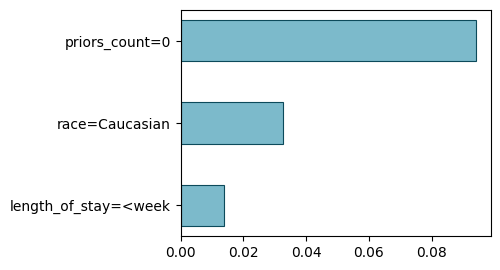

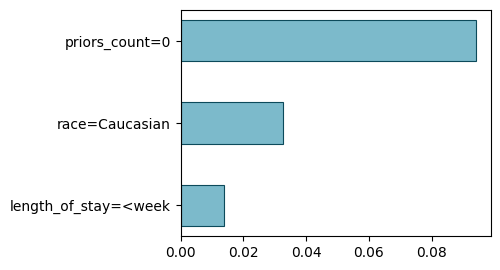

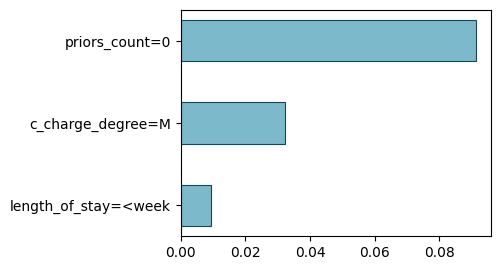

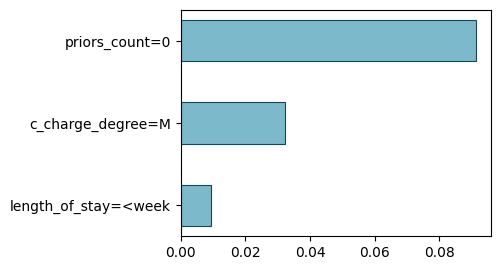

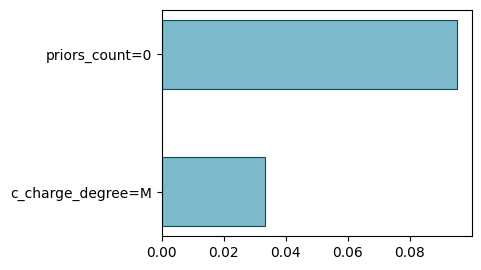

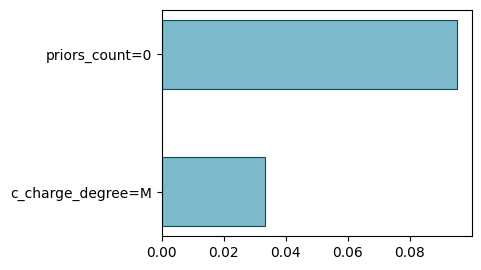

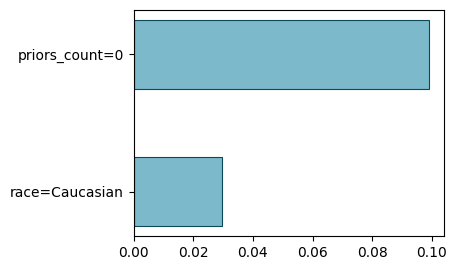

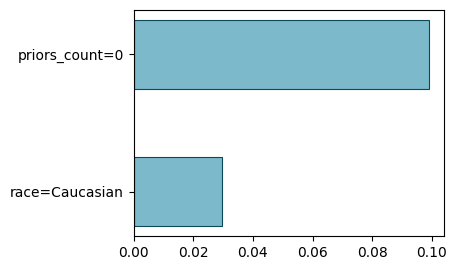

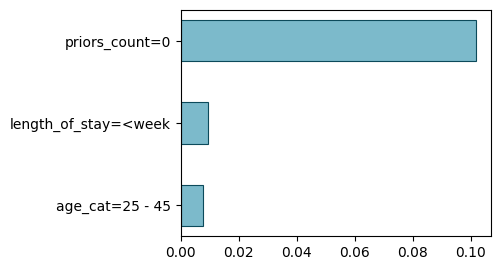

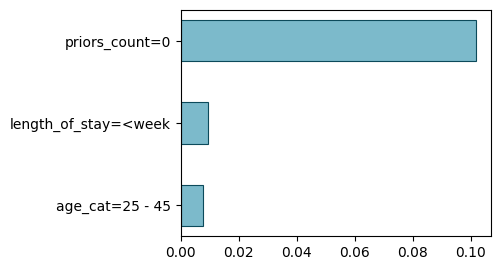

In [56]:
fp_divergence_ofI=fp_divergence_acc
d=fp_divergence_ofI.getDivergence(absF=True)[["itemsets", fp_divergence_ofI.metric]]
topK_fnr=d.loc[d[fp_divergence_ofI.metric]>0].head(5).set_index('itemsets').T.to_dict('int')[fp_divergence_ofI.metric]
for item in topK_fnr.keys():
    fp_divergence_ofI.plotShapleyValue(itemset=item)

Lower accuracy

/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/3875639507.py:3: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/3875639507.py:3: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.



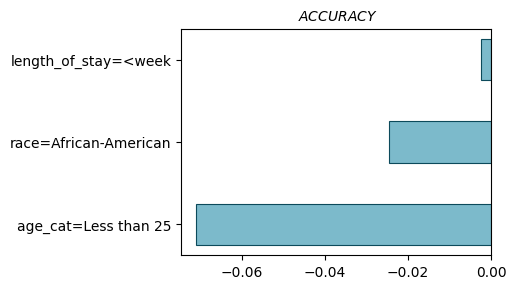

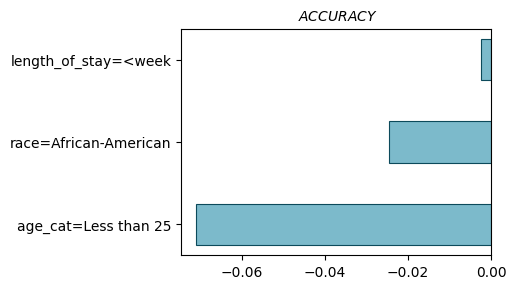

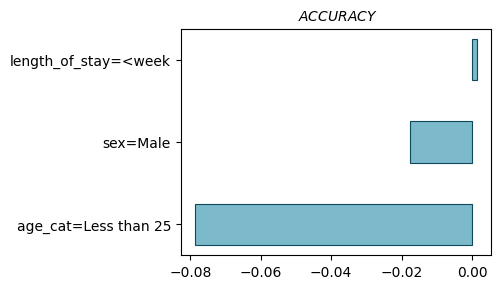

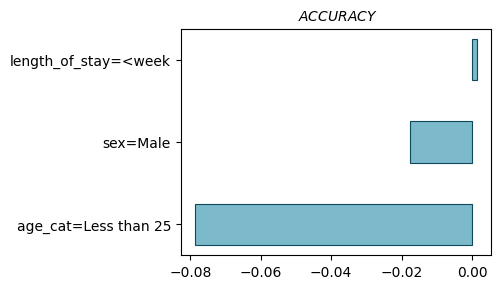

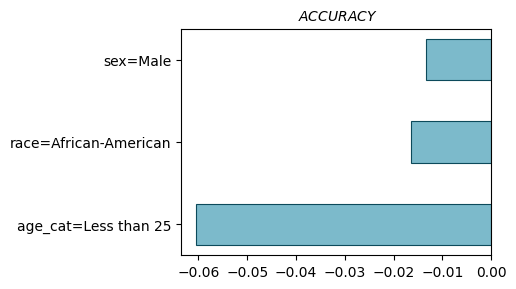

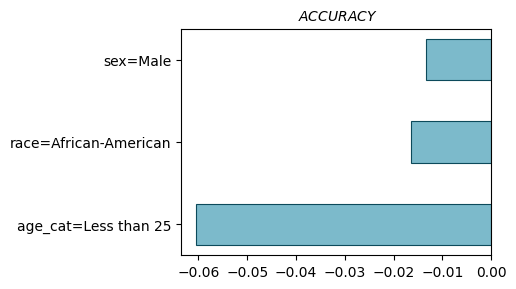

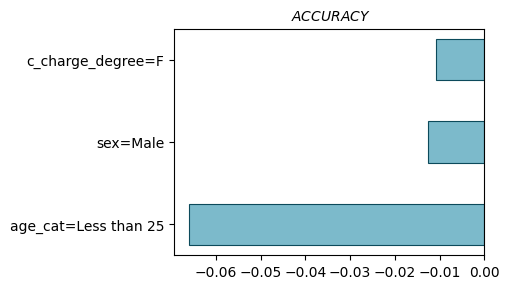

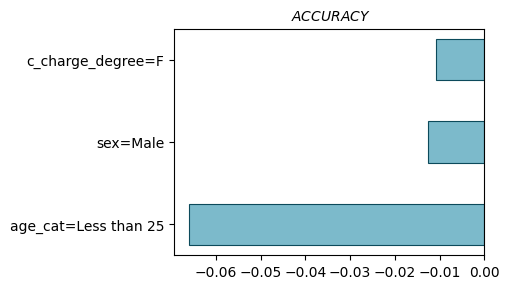

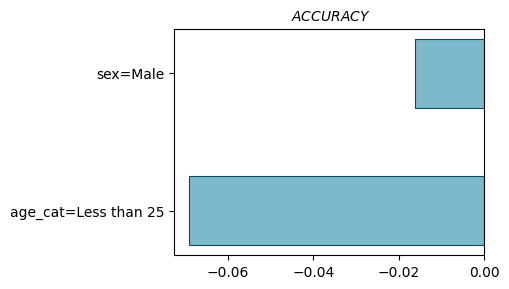

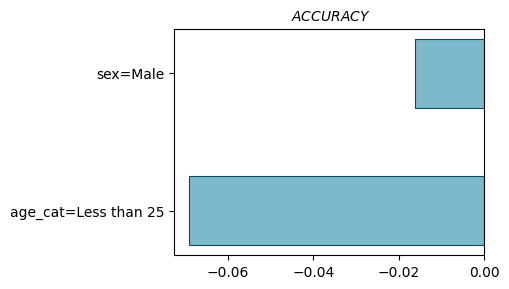

In [57]:
fp_divergence_ofI=fp_divergence_acc
d=fp_divergence_ofI.getDivergence(absF=True)[["itemsets", fp_divergence_ofI.metric]]
topK_fnr=d.loc[d[fp_divergence_ofI.metric]<0].head(5).set_index('itemsets').T.to_dict('int')[fp_divergence_ofI.metric]
for item in topK_fnr.keys():
    fp_divergence_ofI.plotShapleyValue(itemset=item, metric=fp_divergence_ofI.metric_name)

### Corrective

Given an itemset $I$ and an item $i \not\in I$, we say that $i$ is a *corrective item* for $I$ if 
$|\Delta(I \cup i)|<|\Delta(I)|$.


The *corrective factor* of $i$ w.r.t.\ $I$ is 
$|\Delta(I)| - |\Delta(I \cup i)|$.

In [58]:
#Significant corrective items based on t-value of difference
corrSign=fp_divergence_acc.getCorrectiveItems()
corrSign.head(5)

,item i,S,S+i,v_i,v_S,v_S+i,t_value_corr,corr_factor
290,(race=African-American),"(sex=Male, priors_count=0)","(sex=Male, race=African-American, priors_count=0)",-0.023913,0.076534,0.015379,2.776289,0.061155
260,(race=African-American),"(length_of_stay=<week, priors_count=0)","(length_of_stay=<week, race=African-American, priors_count=0)",-0.023913,0.101443,0.043215,2.955671,0.058229
96,(race=African-American),(priors_count=0),"(race=African-American, priors_count=0)",-0.023913,0.092626,0.039767,2.818701,0.052860
297,"(priors_count=[1,3])","(length_of_stay=<week, c_charge_degree=M)","(length_of_stay=<week, c_charge_degree=M, priors_count=[1,3])",-0.023711,0.044867,-0.007410,2.381362,0.037457
244,(race=African-American),"(length_of_stay=<week, c_charge_degree=M)","(race=African-American, length_of_stay=<week, c_charge_degree=M)",-0.023913,0.044867,-0.009307,2.676936,0.035560


,item i,S,S+i,v_i,v_S,v_S+i,t_value_corr,corr_factor
290,(race=African-American),"(sex=Male, priors_count=0)","(sex=Male, race=African-American, priors_count=0)",-0.023913,0.076534,0.015379,2.776289,0.061155
260,(race=African-American),"(length_of_stay=<week, priors_count=0)","(length_of_stay=<week, race=African-American, priors_count=0)",-0.023913,0.101443,0.043215,2.955671,0.058229
96,(race=African-American),(priors_count=0),"(race=African-American, priors_count=0)",-0.023913,0.092626,0.039767,2.818701,0.052860
297,"(priors_count=[1,3])","(length_of_stay=<week, c_charge_degree=M)","(length_of_stay=<week, c_charge_degree=M, priors_count=[1,3])",-0.023711,0.044867,-0.007410,2.381362,0.037457
244,(race=African-American),"(length_of_stay=<week, c_charge_degree=M)","(race=African-American, length_of_stay=<week, c_charge_degree=M)",-0.023913,0.044867,-0.009307,2.676936,0.035560


In [59]:
corrSign=fp_divergence_acc.getCorrectiveItems()
corrSignPrint=printableCorrective(corrSign, fp_divergence_acc.metric_name, abbreviations=abbreviations)   
display(corrSignPrint)
print(corrSignPrint.to_latex(index=False))

,corrective item α,I,ACCURACY(I),ACCURACY(I U α),corr_factor,t_corr
290,race=Afr-Am,"#prior=0, sex=Male",0.077,0.015,0.061,2.8
260,race=Afr-Am,"stay<week, #prior=0",0.101,0.043,0.058,3.0
96,race=Afr-Am,#prior=0,0.093,0.040,0.053,2.8
297,"#prior=[1,3]","charge=M, stay<week",0.045,-0.007,0.037,2.4
244,race=Afr-Am,"charge=M, stay<week",0.045,-0.009,0.036,2.7


,corrective item α,I,ACCURACY(I),ACCURACY(I U α),corr_factor,t_corr
290,race=Afr-Am,"#prior=0, sex=Male",0.077,0.015,0.061,2.8
260,race=Afr-Am,"stay<week, #prior=0",0.101,0.043,0.058,3.0
96,race=Afr-Am,#prior=0,0.093,0.040,0.053,2.8
297,"#prior=[1,3]","charge=M, stay<week",0.045,-0.007,0.037,2.4
244,race=Afr-Am,"charge=M, stay<week",0.045,-0.009,0.036,2.7


\begin{tabular}{llrrrr}
\toprule
corrective item α &                   I &  ACCURACY(I) &  ACCURACY(I U α) &  corr\_factor &  t\_corr \\
\midrule
      race=Afr-Am &  \#prior=0, sex=Male &        0.077 &            0.015 &        0.061 &     2.8 \\
      race=Afr-Am & stay<week, \#prior=0 &        0.101 &            0.043 &        0.058 &     3.0 \\
      race=Afr-Am &            \#prior=0 &        0.093 &            0.040 &        0.053 &     2.8 \\
     \#prior=[1,3] & charge=M, stay<week &        0.045 &           -0.007 &        0.037 &     2.4 \\
      race=Afr-Am & charge=M, stay<week &        0.045 &           -0.009 &        0.036 &     2.7 \\
\bottomrule
\end{tabular}



/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/3414205080.py:4: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



\begin{tabular}{llrrrr}
\toprule
corrective item α &                   I &  ACCURACY(I) &  ACCURACY(I U α) &  corr\_factor &  t\_corr \\
\midrule
      race=Afr-Am &  \#prior=0, sex=Male &        0.077 &            0.015 &        0.061 &     2.8 \\
      race=Afr-Am & stay<week, \#prior=0 &        0.101 &            0.043 &        0.058 &     3.0 \\
      race=Afr-Am &            \#prior=0 &        0.093 &            0.040 &        0.053 &     2.8 \\
     \#prior=[1,3] & charge=M, stay<week &        0.045 &           -0.007 &        0.037 &     2.4 \\
      race=Afr-Am & charge=M, stay<week &        0.045 &           -0.009 &        0.036 &     2.7 \\
\bottomrule
\end{tabular}



/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/3414205080.py:4: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



#### Plot Shapley comparison corrective

In [60]:
fp_divergence_ofI=fp_divergence_acc
corrSign=fp_divergence_ofI.getCorrectiveItems()
id_col=0
if len(corrSign)>0:
    S,S_i=corrSign[["S", "S+i"]].values[id_col].tolist()
    display(fp_divergence_ofI.getInfoItemsets([S,S_i])[ITEMSETS+CLASSIFICATION_METRICS+DIVERGENCE_METRICS+[fp_divergence_ofI.t_value_col]])

,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy,t_value_tp_tn
37,0.252430,"(sex=Male, priors_count=0)",1022.0,85.0,396.0,55.0,0.051068,0.823285,0.710526,-0.037246,0.124816,0.076534,5.862642
144,0.103046,"(sex=Male, race=African-American, priors_count=0)",360.0,53.0,184.0,39.0,0.097744,0.776371,0.649371,0.009430,0.077902,0.015379,0.753259


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy,t_value_tp_tn
37,0.252430,"(sex=Male, priors_count=0)",1022.0,85.0,396.0,55.0,0.051068,0.823285,0.710526,-0.037246,0.124816,0.076534,5.862642
144,0.103046,"(sex=Male, race=African-American, priors_count=0)",360.0,53.0,184.0,39.0,0.097744,0.776371,0.649371,0.009430,0.077902,0.015379,0.753259


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
37,0.252430,"(sex=Male, priors_count=0)",1022.0,85.0,396.0,55.0,0.051068,0.823285,0.710526,-0.037246,0.124816,0.076534
144,0.103046,"(sex=Male, race=African-American, priors_count=0)",360.0,53.0,184.0,39.0,0.097744,0.776371,0.649371,0.009430,0.077902,0.015379


,support,itemsets,tn,tp,fn,fp,fpr,fnr,accuracy,d_fpr,d_fnr,d_accuracy
37,0.252430,"(sex=Male, priors_count=0)",1022.0,85.0,396.0,55.0,0.051068,0.823285,0.710526,-0.037246,0.124816,0.076534
144,0.103046,"(sex=Male, race=African-American, priors_count=0)",360.0,53.0,184.0,39.0,0.097744,0.776371,0.649371,0.009430,0.077902,0.015379


∇ACCURACY(S):0.077 -->  ∇ACCURACY(S U i):0.015
∇ACCURACY(S):0.077 -->  ∇ACCURACY(S U i):0.015


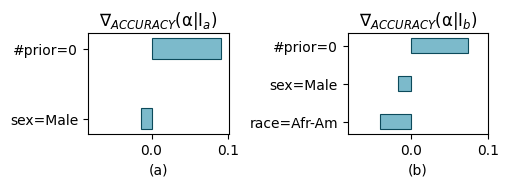

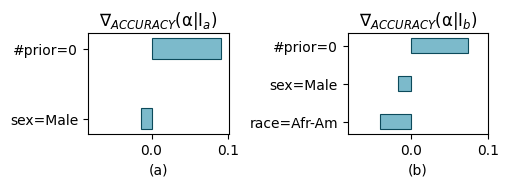

In [61]:
id_col=0
fp_divergence_ofI=fp_divergence_acc
corrSign=fp_divergence_ofI.getCorrectiveItems()

if len(corrSign)>id_col:
    outputName=f"{outDirShap}/{dataset_name}_shap_corrective_{fp_divergence_ofI.metric_name}_{min_sup}"
    S,S_i, v_S, v_Si=corrSign[["S", "S+i", "v_S", "v_S+i"]].head(id_col+1).values[id_col].tolist()
    display(fp_divergence_ofI.getInfoItemsets([S,S_i])[ITEMSETS+CLASSIFICATION_METRICS+DIVERGENCE_METRICS])
    shap_itemset1=abbreviateDict(fp_divergence_ofI.computeShapleyValue(S), abbreviations)
    shap_itemset2=abbreviateDict(fp_divergence_ofI.computeShapleyValue(S_i), abbreviations)
    id1, id2="$_a$", "$_b$" #"",""
    t1, t2=f"$∇_{{{fp_divergence_ofI.metric_name}}}$(α|I{id1})", f"$∇_{{{fp_divergence_ofI.metric_name}}}$(α|I{id2})"
    print(f"∇{fp_divergence_ofI.metric_name}(S):{round(v_S,3)} -->  ∇{fp_divergence_ofI.metric_name}(S U i):{round(v_Si,3)}")

    plotComparisonShapleyValues(shap_itemset1, shap_itemset2, height=[0.3, 0.4], sharedAxis=True, \
                        sizeFig=(5.2, 1.9), title=[t1,t2], saveFig=saveFig, nameFig=outputName, pad=1.5,\
                               metrics_name=[fp_divergence_ofI.metric_name, fp_divergence_ofI.metric_name])

#### Lattice

In [62]:
id_col=0
fp_divergence_ofI=fp_divergence_acc
corrSign=fp_divergence_ofI.getCorrectiveItems()
if len(corrSign)>id_col:
    S_i=corrSign[["S+i"]].head(id_col+1).values[id_col][0]
    print(S_i)
    fig1=fp_divergence_ofI.plotLatticeItemset(S_i, Th_divergence=0.15, sizeDot="small", getLower=True)
    if saveFig:
        fig1.write_image(f"{outDirLattice}/lattice_corrective_{dataset_name}_{fp_divergence_ofI.metric_name}_{min_sup}.pdf")

frozenset({'sex=Male', 'race=African-American', 'priors_count=0'})
frozenset({'sex=Male', 'race=African-American', 'priors_count=0'})


## For interactive analysis

In [63]:
selectItemsInteractive(fp_divergence_acc)

Button(description='Select items', style=ButtonStyle())

Button(description='Select items', style=ButtonStyle())

# Comparison Top FNR/FPR

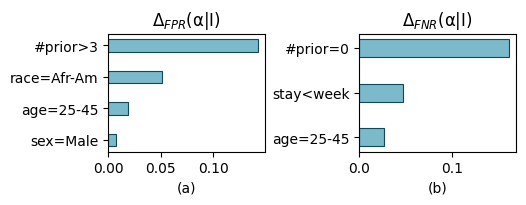

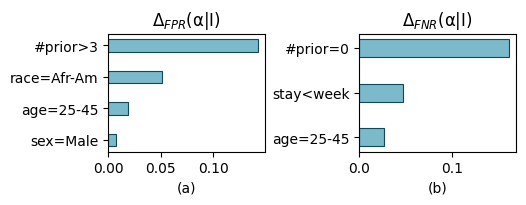

In [64]:
outputName=f"{outDirShap}/{dataset_name}_shap_{fp_divergence_fpr.metric_name}_{fp_divergence_fnr.metric_name}_{min_sup}"
itemsetFP=list(fp_divergence_fpr.getDivergenceTopK(K=1, th_redundancy=0).keys())[0]
shap_itemsetFP=abbreviateDict(fp_divergence_fpr.computeShapleyValue(itemsetFP), abbreviations)

itemsetFN=list(fp_divergence_fnr.getDivergenceTopK(K=1, th_redundancy=0).keys())[0]
shap_itemsetFN=abbreviateDict(fp_divergence_fnr.computeShapleyValue(itemsetFN), abbreviations)
t1, t2=f"$Δ_{{{fp_divergence_fpr.metric_name}}}$(α|I)", f"$Δ_{{{fp_divergence_fnr.metric_name}}}$(α|I)"

plotComparisonShapleyValues(shap_itemsetFP, shap_itemsetFN, height=0.4, sharedAxis=False, \
                    sizeFig=(5.2,1.8), title=[t1,t2], saveFig=saveFig, nameFig=outputName, pad=0.5, \
                            metrics_name=[fp_divergence_fpr.metric_name, fp_divergence_fnr.metric_name])

# One class

## Extract divergence

In [65]:
fp_diver_1c=FP_DivergenceExplorer(X_discretized, predicted_class_name = "predicted", ignore_cols=["class"], class_map=class_map, dataset_name=dataset_name)
FP_fm_1c=fp_diver_1c.getFrequentPatternDivergence(min_support=min_sup, metrics=["d_posr", "d_negr"])
colsOfI_1c=["support", "itemsets", "P", "N", "posr", "d_posr", "negr", "d_negr"]
FP_fm_1c[colsOfI_1c].sort_values("negr", ascending=False).head()

,support,itemsets,P,N,posr,d_posr,negr,d_negr
147,0.101750,"(race=Caucasian, age_cat=Greater than 45)",18.0,610.0,0.028662,-0.156691,0.971338,0.156691
76,0.158782,"(length_of_stay=<week, age_cat=Greater than 45)",37.0,943.0,0.037755,-0.147598,0.962245,0.147598
128,0.119086,"(length_of_stay=<week, c_charge_degree=M, race=Caucasian)",30.0,705.0,0.040816,-0.144537,0.959184,0.144537
116,0.127025,"(sex=Male, age_cat=Greater than 45, length_of_stay=<week)",33.0,751.0,0.042092,-0.143261,0.957908,0.143261
88,0.148250,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45)",39.0,876.0,0.042623,-0.142730,0.957377,0.142730


,support,itemsets,P,N,posr,d_posr,negr,d_negr
147,0.101750,"(race=Caucasian, age_cat=Greater than 45)",18.0,610.0,0.028662,-0.156691,0.971338,0.156691
76,0.158782,"(length_of_stay=<week, age_cat=Greater than 45)",37.0,943.0,0.037755,-0.147598,0.962245,0.147598
128,0.119086,"(length_of_stay=<week, c_charge_degree=M, race=Caucasian)",30.0,705.0,0.040816,-0.144537,0.959184,0.144537
116,0.127025,"(sex=Male, age_cat=Greater than 45, length_of_stay=<week)",33.0,751.0,0.042092,-0.143261,0.957908,0.143261
88,0.148250,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45)",39.0,876.0,0.042623,-0.142730,0.957377,0.142730


## FPR

In [66]:
fp_divergence_posr=FP_Divergence(FP_fm_1c, "d_posr")

In [67]:
fp_divergence_posr.getInfoItemset(frozenset())[colsOfI_1c]

,support,itemsets,P,N,posr,d_posr,negr,d_negr
0,1.0,(),1144.0,5028.0,0.185353,0.0,0.814647,0.0


,support,itemsets,P,N,posr,d_posr,negr,d_negr
0,1.0,(),1144.0,5028.0,0.185353,0.0,0.814647,0.0


### Top FPR

In [68]:
fp_divergence_posr.getDivergence(th_redundancy=0)[colsOfI_1c].head(10)

,support,itemsets,P,N,posr,d_posr,negr,d_negr
135,0.109527,"(c_charge_degree=F, race=African-American, age_cat=25 - 45, priors_count=>3)",320.0,356.0,0.473373,0.288020,0.526627,-0.288020
112,0.128645,"(sex=Male, race=African-American, age_cat=25 - 45, priors_count=>3)",371.0,423.0,0.467254,0.281901,0.532746,-0.281901
109,0.130752,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=>3)",373.0,434.0,0.462206,0.276852,0.537794,-0.276852
92,0.145010,"(race=African-American, age_cat=25 - 45, priors_count=>3)",412.0,483.0,0.460335,0.274982,0.539665,-0.274982
87,0.148412,"(c_charge_degree=F, race=African-American, priors_count=>3)",417.0,499.0,0.455240,0.269887,0.544760,-0.269887
67,0.175308,"(sex=Male, race=African-American, priors_count=>3)",474.0,608.0,0.438078,0.252724,0.561922,-0.252724
55,0.196695,"(race=African-American, priors_count=>3)",528.0,686.0,0.434926,0.249573,0.565074,-0.249573
105,0.133668,"(c_charge_degree=F, sex=Male, age_cat=25 - 45, priors_count=>3)",358.0,467.0,0.433939,0.248586,0.566061,-0.248586
82,0.155865,"(c_charge_degree=F, age_cat=25 - 45, priors_count=>3)",406.0,556.0,0.422037,0.236684,0.577963,-0.236684
62,0.180655,"(sex=Male, age_cat=25 - 45, priors_count=>3)",456.0,659.0,0.408969,0.223615,0.591031,-0.223615


,support,itemsets,P,N,posr,d_posr,negr,d_negr
135,0.109527,"(c_charge_degree=F, race=African-American, age_cat=25 - 45, priors_count=>3)",320.0,356.0,0.473373,0.288020,0.526627,-0.288020
112,0.128645,"(sex=Male, race=African-American, age_cat=25 - 45, priors_count=>3)",371.0,423.0,0.467254,0.281901,0.532746,-0.281901
109,0.130752,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=>3)",373.0,434.0,0.462206,0.276852,0.537794,-0.276852
92,0.145010,"(race=African-American, age_cat=25 - 45, priors_count=>3)",412.0,483.0,0.460335,0.274982,0.539665,-0.274982
87,0.148412,"(c_charge_degree=F, race=African-American, priors_count=>3)",417.0,499.0,0.455240,0.269887,0.544760,-0.269887
67,0.175308,"(sex=Male, race=African-American, priors_count=>3)",474.0,608.0,0.438078,0.252724,0.561922,-0.252724
55,0.196695,"(race=African-American, priors_count=>3)",528.0,686.0,0.434926,0.249573,0.565074,-0.249573
105,0.133668,"(c_charge_degree=F, sex=Male, age_cat=25 - 45, priors_count=>3)",358.0,467.0,0.433939,0.248586,0.566061,-0.248586
82,0.155865,"(c_charge_degree=F, age_cat=25 - 45, priors_count=>3)",406.0,556.0,0.422037,0.236684,0.577963,-0.236684
62,0.180655,"(sex=Male, age_cat=25 - 45, priors_count=>3)",456.0,659.0,0.408969,0.223615,0.591031,-0.223615


Top FPR - Only divergence info

In [69]:
fp_divergence_posr.getDivergence(th_redundancy=0)[["support", "itemsets",  fp_divergence_posr.metric, fp_divergence_posr.t_value_col]].head(5)

,support,itemsets,d_posr,t_value_tp_fn
135,0.109527,"(c_charge_degree=F, race=African-American, age_cat=25 - 45, priors_count=>3)",0.288020,14.553174
112,0.128645,"(sex=Male, race=African-American, age_cat=25 - 45, priors_count=>3)",0.281901,15.359601
109,0.130752,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=>3)",0.276852,15.208669
92,0.145010,"(race=African-American, age_cat=25 - 45, priors_count=>3)",0.274982,15.845877
87,0.148412,"(c_charge_degree=F, race=African-American, priors_count=>3)",0.269887,15.731106


,support,itemsets,d_posr,t_value_tp_fn
135,0.109527,"(c_charge_degree=F, race=African-American, age_cat=25 - 45, priors_count=>3)",0.288020,14.553174
112,0.128645,"(sex=Male, race=African-American, age_cat=25 - 45, priors_count=>3)",0.281901,15.359601
109,0.130752,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=>3)",0.276852,15.208669
92,0.145010,"(race=African-American, age_cat=25 - 45, priors_count=>3)",0.274982,15.845877
87,0.148412,"(c_charge_degree=F, race=African-American, priors_count=>3)",0.269887,15.731106


Formatted

In [70]:
div_posr=fp_divergence_posr.getDivergence(th_redundancy=0)[["support", "itemsets",  fp_divergence_posr.metric, fp_divergence_posr.t_value_col]]
div_pr_posr=printable(div_posr.head(3), abbreviations=abbreviations)
display(div_pr_posr)

,itemsets,sup,d_posr,t_tp_fn
135,"age=25-45, charge=F, #prior>3, race=Afr-Am",0.11,0.288,14.6
112,"age=25-45, #prior>3, race=Afr-Am, sex=Male",0.13,0.282,15.4
109,"charge=F, #prior>3, race=Afr-Am, sex=Male",0.13,0.277,15.2


,itemsets,sup,d_posr,t_tp_fn
135,"age=25-45, charge=F, #prior>3, race=Afr-Am",0.11,0.288,14.6
112,"age=25-45, #prior>3, race=Afr-Am, sex=Male",0.13,0.282,15.4
109,"charge=F, #prior>3, race=Afr-Am, sex=Male",0.13,0.277,15.2


Threshold on redundancy

In [71]:
div_posr=fp_divergence_posr.getDivergence(th_redundancy=0)[["support", "itemsets",  fp_divergence_posr.metric, fp_divergence_posr.t_value_col]]
div_pr_posr=printable(div_posr.head(3), abbreviations=abbreviations)
print(f"{dataset_name} - #FP: {len(FP_fm)-1} - {fp_divergence_posr.metric_name}")
display(div_pr_posr)

compas - #FP: 154 - POSR


,itemsets,sup,d_posr,t_tp_fn
135,"age=25-45, charge=F, #prior>3, race=Afr-Am",0.11,0.288,14.6
112,"age=25-45, #prior>3, race=Afr-Am, sex=Male",0.13,0.282,15.4
109,"charge=F, #prior>3, race=Afr-Am, sex=Male",0.13,0.277,15.2


compas - #FP: 154 - POSR


,itemsets,sup,d_posr,t_tp_fn
135,"age=25-45, charge=F, #prior>3, race=Afr-Am",0.11,0.288,14.6
112,"age=25-45, #prior>3, race=Afr-Am, sex=Male",0.13,0.282,15.4
109,"charge=F, #prior>3, race=Afr-Am, sex=Male",0.13,0.277,15.2


Printable - threshold on redundancy

In [72]:
th_redundancy=0.05
div_posr=fp_divergence_posr.getDivergence(th_redundancy=th_redundancy)[["support", "itemsets",  fp_divergence_posr.metric, fp_divergence_posr.t_value_col]]
div_pr_posr=printable(div_posr.head(3), abbreviations=abbreviations)
print(f"{dataset_name} - #FP: {len(div_posr)-1} - {fp_divergence_posr.metric_name} - th_redundancy: {th_redundancy}")
display(div_pr_posr)

compas - #FP: 15 - POSR - th_redundancy: 0.05
compas - #FP: 15 - POSR - th_redundancy: 0.05


,itemsets,sup,d_posr,t_tp_fn
55,"#prior>3, race=Afr-Am",0.20,0.250,16.6
28,#prior>3,0.29,0.185,15.0
65,stay=1w-3M,0.18,0.113,7.7


,itemsets,sup,d_posr,t_tp_fn
55,"#prior>3, race=Afr-Am",0.20,0.250,16.6
28,#prior>3,0.29,0.185,15.0
65,stay=1w-3M,0.18,0.113,7.7


### Shapley value of TOP-K patterns

In [73]:
fp_divergence_ofI=fp_divergence_posr
topK_fpr=fp_divergence_ofI.getDivergenceTopK(K=5, th_redundancy=0)
topK_fpr

{frozenset({'age_cat=25 - 45',
            'c_charge_degree=F',
            'priors_count=>3',
            'race=African-American'}): 0.2880195730287958,
 frozenset({'age_cat=25 - 45',
            'priors_count=>3',
            'race=African-American',
            'sex=Male'}): 0.2819012000241604,
 frozenset({'c_charge_degree=F',
            'priors_count=>3',
            'race=African-American',
            'sex=Male'}): 0.27685249208762286,
 frozenset({'age_cat=25 - 45',
            'priors_count=>3',
            'race=African-American'}): 0.27498198749443337,
 frozenset({'c_charge_degree=F',
            'priors_count=>3',
            'race=African-American'}): 0.26988696663619616}

{frozenset({'age_cat=25 - 45',
            'c_charge_degree=F',
            'priors_count=>3',
            'race=African-American'}): 0.2880195730287958,
 frozenset({'age_cat=25 - 45',
            'priors_count=>3',
            'race=African-American',
            'sex=Male'}): 0.2819012000241604,
 frozenset({'c_charge_degree=F',
            'priors_count=>3',
            'race=African-American',
            'sex=Male'}): 0.27685249208762286,
 frozenset({'age_cat=25 - 45',
            'priors_count=>3',
            'race=African-American'}): 0.27498198749443337,
 frozenset({'c_charge_degree=F',
            'priors_count=>3',
            'race=African-American'}): 0.26988696663619616}

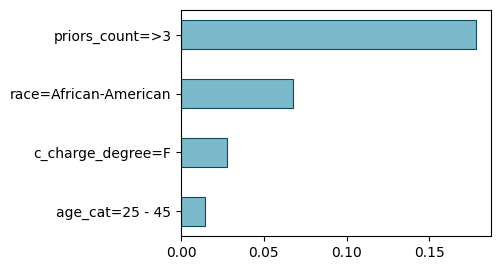

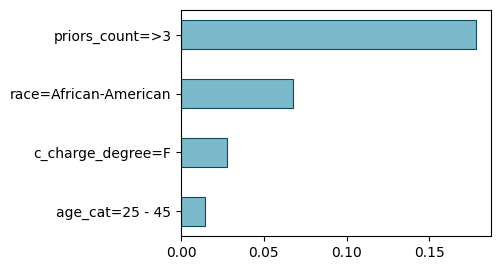

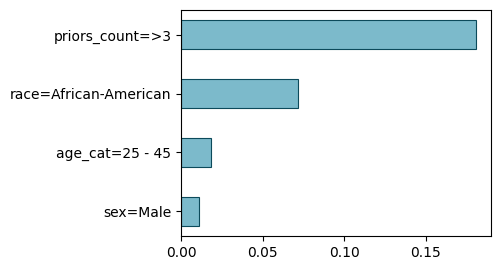

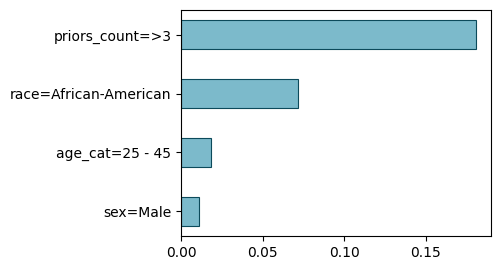

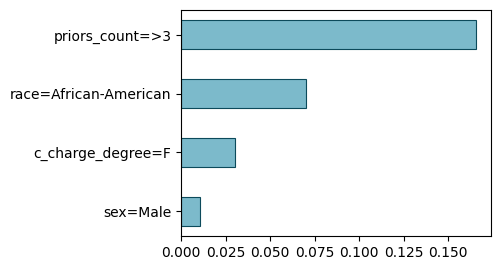

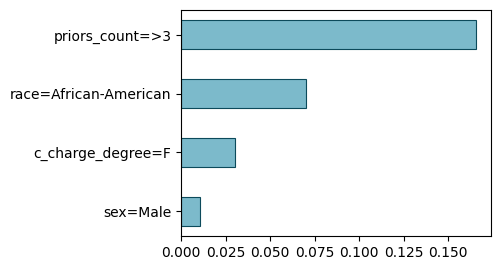

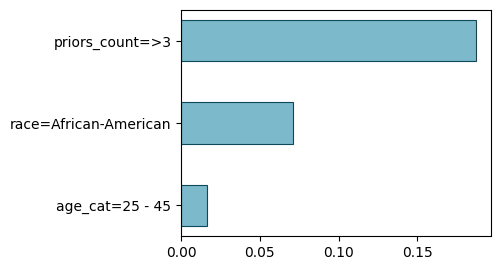

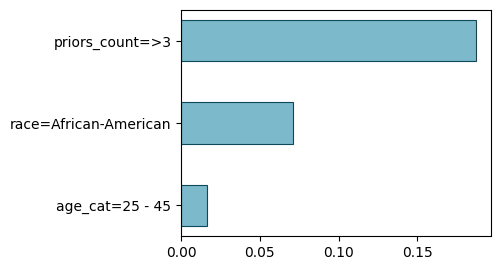

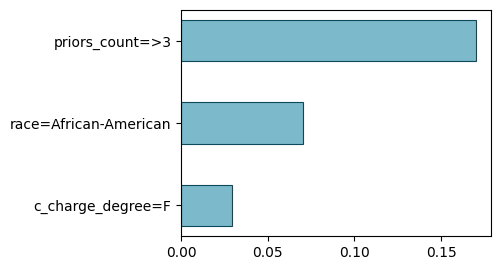

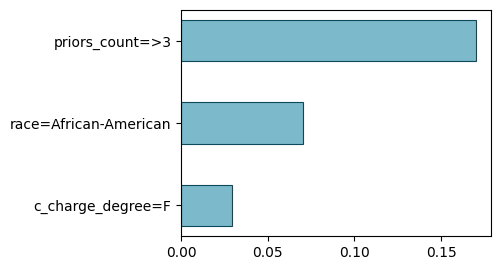

In [74]:
fp_divergence_ofI=fp_divergence_posr
topK_fpr=fp_divergence_ofI.getDivergenceTopK(K=5, th_redundancy=0)
for item in topK_fpr.keys():
    fp_divergence_ofI.plotShapleyValue(itemset=item)

{frozenset({'c_charge_degree=F', 'race=African-American', 'age_cat=25 - 45', 'priors_count=>3'}): 0.2880195730287958}
{frozenset({'c_charge_degree=F', 'race=African-American', 'age_cat=25 - 45', 'priors_count=>3'}): 0.2880195730287958}


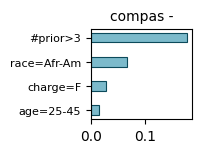

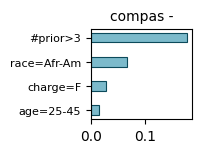

In [75]:
outputName=f"{outDirShap}/{dataset_name}_shap_{fp_divergence_posr.metric_name}_{min_sup}"
itemset_div=fp_divergence_posr.getDivergenceTopK(K=1, th_redundancy=0)
print(itemset_div)
itemset_shap=fp_divergence_posr.computeShapleyValue(list(itemset_div.keys())[0])
fp_divergence_posr.plotShapleyValue(shapley_values=itemset_shap, abbreviations=abbreviations,\
                 height=0.4,\
                 title=f"{dataset_name} -", sizeFig=(1.3,1.2), labelsize=8, saveFig=False, nameFig=outputName)

#### Lattice Explorer

In [76]:
top1=list(fp_divergence_posr.getDivergenceTopK(K=1, th_redundancy=0).keys())[0]
fig1=fp_divergence_posr.plotLatticeItemset(top1, Th_divergence=0.15, sizeDot="small", getLower=True)

### Corrective

Given an itemset $I$ and an item $i \not\in I$, we say that $i$ is a *corrective item* for $I$ if 
$|\Delta(I \cup i)|<|\Delta(I)|$.


The *corrective factor* of $i$ w.r.t.\ $I$ is 
$|\Delta(I)| - |\Delta(I \cup i)|$.

In [77]:
#Significant corrective items based on t-value of difference
corrSign=fp_divergence_posr.getCorrectiveItems()
corrSign.head(5)

,item i,S,S+i,v_i,v_S,v_S+i,t_value_corr,corr_factor
402,"(priors_count=[1,3])","(c_charge_degree=F, sex=Male, race=African-American)","(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",-0.052664,0.130551,0.043679,4.300700,0.086872
258,"(priors_count=[1,3])","(c_charge_degree=F, race=African-American)","(c_charge_degree=F, race=African-American, priors_count=[1,3])",-0.052664,0.113827,0.027998,4.805927,0.085830
207,"(priors_count=[1,3])","(sex=Male, race=African-American)","(sex=Male, race=African-American, priors_count=[1,3])",-0.052664,0.099110,0.013986,5.319613,0.085124
73,"(priors_count=[1,3])",(race=African-American),"(race=African-American, priors_count=[1,3])",-0.052664,0.080789,0.000297,5.704848,0.080492
84,(c_charge_degree=M),(race=African-American),"(c_charge_degree=M, race=African-American)",-0.070458,0.080789,0.006679,4.965468,0.074109


,item i,S,S+i,v_i,v_S,v_S+i,t_value_corr,corr_factor
402,"(priors_count=[1,3])","(c_charge_degree=F, sex=Male, race=African-American)","(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",-0.052664,0.130551,0.043679,4.300700,0.086872
258,"(priors_count=[1,3])","(c_charge_degree=F, race=African-American)","(c_charge_degree=F, race=African-American, priors_count=[1,3])",-0.052664,0.113827,0.027998,4.805927,0.085830
207,"(priors_count=[1,3])","(sex=Male, race=African-American)","(sex=Male, race=African-American, priors_count=[1,3])",-0.052664,0.099110,0.013986,5.319613,0.085124
73,"(priors_count=[1,3])",(race=African-American),"(race=African-American, priors_count=[1,3])",-0.052664,0.080789,0.000297,5.704848,0.080492
84,(c_charge_degree=M),(race=African-American),"(c_charge_degree=M, race=African-American)",-0.070458,0.080789,0.006679,4.965468,0.074109


In [78]:
corrSign=fp_divergence_posr.getCorrectiveItems()
corrSignPrint=printableCorrective(corrSign, fp_divergence_posr.metric_name, abbreviations=abbreviations)   
display(corrSignPrint)

,corrective item α,I,POSR(I),POSR(I U α),corr_factor,t_corr
402,"#prior=[1,3]","charge=F, race=Afr-Am, sex=Male",0.131,0.044,0.087,4.3
258,"#prior=[1,3]","charge=F, race=Afr-Am",0.114,0.028,0.086,4.8
207,"#prior=[1,3]","race=Afr-Am, sex=Male",0.099,0.014,0.085,5.3
73,"#prior=[1,3]",race=Afr-Am,0.081,0.000,0.080,5.7
84,charge=M,race=Afr-Am,0.081,0.007,0.074,5.0


,corrective item α,I,POSR(I),POSR(I U α),corr_factor,t_corr
402,"#prior=[1,3]","charge=F, race=Afr-Am, sex=Male",0.131,0.044,0.087,4.3
258,"#prior=[1,3]","charge=F, race=Afr-Am",0.114,0.028,0.086,4.8
207,"#prior=[1,3]","race=Afr-Am, sex=Male",0.099,0.014,0.085,5.3
73,"#prior=[1,3]",race=Afr-Am,0.081,0.000,0.080,5.7
84,charge=M,race=Afr-Am,0.081,0.007,0.074,5.0


Details of $S$ and $S \cup i$ for the top corrective items

In [79]:
d=fp_divergence_posr.getCorrectiveItems()
itemsetsOfI=d[["S", "S+i"]].head(4).values
for S,S_i in itemsetsOfI:
    display(fp_divergence_posr.getInfoItemsets([S,S_i])[colsOfI_1c])

,support,itemsets,P,N,posr,d_posr,negr,d_negr
27,0.297472,"(c_charge_degree=F, sex=Male, race=African-American)",580.0,1256.0,0.315904,0.130551,0.684096,-0.130551
153,0.100454,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",142.0,478.0,0.229032,0.043679,0.770968,-0.043679


,support,itemsets,P,N,posr,d_posr,negr,d_negr
27,0.297472,"(c_charge_degree=F, sex=Male, race=African-American)",580.0,1256.0,0.315904,0.130551,0.684096,-0.130551
153,0.100454,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",142.0,478.0,0.229032,0.043679,0.770968,-0.043679


,support,itemsets,P,N,posr,d_posr,negr,d_negr
17,0.355800,"(c_charge_degree=F, race=African-American)",657.0,1539.0,0.299180,0.113827,0.700820,-0.113827
119,0.123785,"(c_charge_degree=F, race=African-American, priors_count=[1,3])",163.0,601.0,0.213351,0.027998,0.786649,-0.027998


,support,itemsets,P,N,posr,d_posr,negr,d_negr
17,0.355800,"(c_charge_degree=F, race=African-American)",657.0,1539.0,0.299180,0.113827,0.700820,-0.113827
119,0.123785,"(c_charge_degree=F, race=African-American, priors_count=[1,3])",163.0,601.0,0.213351,0.027998,0.786649,-0.027998


,support,itemsets,P,N,posr,d_posr,negr,d_negr
11,0.425470,"(sex=Male, race=African-American)",747.0,1879.0,0.284463,0.099110,0.715537,-0.099110
89,0.147116,"(sex=Male, race=African-American, priors_count=[1,3])",181.0,727.0,0.199339,0.013986,0.800661,-0.013986


,support,itemsets,P,N,posr,d_posr,negr,d_negr
11,0.425470,"(sex=Male, race=African-American)",747.0,1879.0,0.284463,0.099110,0.715537,-0.099110
89,0.147116,"(sex=Male, race=African-American, priors_count=[1,3])",181.0,727.0,0.199339,0.013986,0.800661,-0.013986


,support,itemsets,P,N,posr,d_posr,negr,d_negr
7,0.514420,(race=African-American),845.0,2330.0,0.266142,0.080789,0.733858,-0.080789
63,0.180655,"(race=African-American, priors_count=[1,3])",207.0,908.0,0.185650,0.000297,0.814350,-0.000297


,support,itemsets,P,N,posr,d_posr,negr,d_negr
7,0.514420,(race=African-American),845.0,2330.0,0.266142,0.080789,0.733858,-0.080789
63,0.180655,"(race=African-American, priors_count=[1,3])",207.0,908.0,0.185650,0.000297,0.814350,-0.000297


#### Plot Shapley comparison corrective

,support,itemsets,P,N,posr,d_posr,negr,d_negr
27,0.297472,"(c_charge_degree=F, sex=Male, race=African-American)",580.0,1256.0,0.315904,0.130551,0.684096,-0.130551
153,0.100454,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",142.0,478.0,0.229032,0.043679,0.770968,-0.043679


,support,itemsets,P,N,posr,d_posr,negr,d_negr
27,0.297472,"(c_charge_degree=F, sex=Male, race=African-American)",580.0,1256.0,0.315904,0.130551,0.684096,-0.130551
153,0.100454,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",142.0,478.0,0.229032,0.043679,0.770968,-0.043679


∇POSR(S):0.131 -->  ∇POSR(S U i):0.044
∇POSR(S):0.131 -->  ∇POSR(S U i):0.044


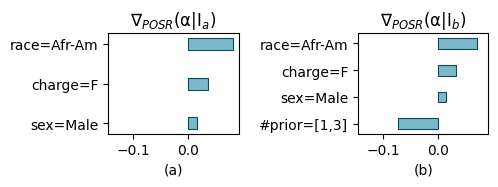

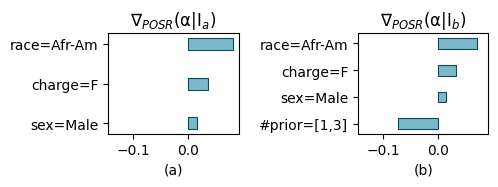

In [80]:
id_col=0
fp_divergence_ofI=fp_divergence_posr
corrSign=fp_divergence_ofI.getCorrectiveItems()

if len(corrSign)>id_col:
    outputName=f"{outDirShap}/{dataset_name}_shap_corrective_{fp_divergence_ofI.metric_name}_{min_sup}"
    S,S_i, v_S, v_Si=corrSign[["S", "S+i", "v_S", "v_S+i"]].head(id_col+1).values[id_col].tolist()
    display(fp_divergence_ofI.getInfoItemsets([S,S_i])[colsOfI_1c])
    shap_itemset1=abbreviateDict(fp_divergence_ofI.computeShapleyValue(S), abbreviations)
    shap_itemset2=abbreviateDict(fp_divergence_ofI.computeShapleyValue(S_i), abbreviations)
    id1, id2="$_a$", "$_b$" 
    t1, t2=f"$∇_{{{fp_divergence_ofI.metric_name}}}$(α|I{id1})", f"$∇_{{{fp_divergence_ofI.metric_name}}}$(α|I{id2})"
    print(f"∇{fp_divergence_ofI.metric_name}(S):{round(v_S,3)} -->  ∇{fp_divergence_ofI.metric_name}(S U i):{round(v_Si,3)}")

    plotComparisonShapleyValues(shap_itemset1, shap_itemset2, height=[0.3, 0.4], sharedAxis=True, \
                        sizeFig=(5.2, 1.9), title=[t1,t2], saveFig=False, nameFig=outputName, pad=1.5,\
                               metrics_name=[fp_divergence_ofI.metric_name, fp_divergence_ofI.metric_name])

#### Lattice

In [81]:
id_col=0
fp_divergence_ofI=fp_divergence_posr
corrSign=fp_divergence_ofI.getCorrectiveItems()
if len(corrSign)>id_col:
    S_i=corrSign[["S+i"]].head(id_col+1).values[id_col][0]
    print(S_i)
    fig1=fp_divergence_ofI.plotLatticeItemset(S_i, Th_divergence=0.15, sizeDot="small", getLower=True)
    if saveFig:
        fig1.write_image(f"{outDirLattice}/lattice_corrective_{dataset_name}_{fp_divergence_ofI.metric_name}_{min_sup}.pdf")

frozenset({'c_charge_degree=F', 'sex=Male', 'race=African-American', 'priors_count=[1,3]'})
frozenset({'c_charge_degree=F', 'sex=Male', 'race=African-American', 'priors_count=[1,3]'})


## For interactive analysis

In [82]:
selectItemsInteractive(fp_divergence_posr)

Button(description='Select items', style=ButtonStyle())

Button(description='Select items', style=ButtonStyle())

## FNR

In [83]:
fp_divergence_negr=FP_Divergence(FP_fm_1c, "d_negr")

### Top Neg RATE

In [84]:
fp_divergence_negr.getDivergence(th_redundancy=0)[colsOfI_1c].head(10)

,support,itemsets,P,N,posr,d_posr,negr,d_negr
147,0.101750,"(race=Caucasian, age_cat=Greater than 45)",18.0,610.0,0.028662,-0.156691,0.971338,0.156691
76,0.158782,"(length_of_stay=<week, age_cat=Greater than 45)",37.0,943.0,0.037755,-0.147598,0.962245,0.147598
128,0.119086,"(length_of_stay=<week, c_charge_degree=M, race=Caucasian)",30.0,705.0,0.040816,-0.144537,0.959184,0.144537
116,0.127025,"(sex=Male, age_cat=Greater than 45, length_of_stay=<week)",33.0,751.0,0.042092,-0.143261,0.957908,0.143261
88,0.148250,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45)",39.0,876.0,0.042623,-0.142730,0.957377,0.142730
129,0.118600,"(length_of_stay=<week, priors_count=0, race=Caucasian)",32.0,700.0,0.043716,-0.141637,0.956284,0.141637
90,0.146630,"(length_of_stay=<week, c_charge_degree=M, priors_count=0)",41.0,864.0,0.045304,-0.140049,0.954696,0.140049
142,0.107097,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45, sex=Male)",30.0,631.0,0.045386,-0.139967,0.954614,0.139967
152,0.101102,"(length_of_stay=<week, c_charge_degree=M, sex=Male, priors_count=0)",29.0,595.0,0.046474,-0.138879,0.953526,0.138879
146,0.102398,"(length_of_stay=<week, c_charge_degree=M, priors_count=[1,3])",33.0,599.0,0.052215,-0.133138,0.947785,0.133138


,support,itemsets,P,N,posr,d_posr,negr,d_negr
147,0.101750,"(race=Caucasian, age_cat=Greater than 45)",18.0,610.0,0.028662,-0.156691,0.971338,0.156691
76,0.158782,"(length_of_stay=<week, age_cat=Greater than 45)",37.0,943.0,0.037755,-0.147598,0.962245,0.147598
128,0.119086,"(length_of_stay=<week, c_charge_degree=M, race=Caucasian)",30.0,705.0,0.040816,-0.144537,0.959184,0.144537
116,0.127025,"(sex=Male, age_cat=Greater than 45, length_of_stay=<week)",33.0,751.0,0.042092,-0.143261,0.957908,0.143261
88,0.148250,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45)",39.0,876.0,0.042623,-0.142730,0.957377,0.142730
129,0.118600,"(length_of_stay=<week, priors_count=0, race=Caucasian)",32.0,700.0,0.043716,-0.141637,0.956284,0.141637
90,0.146630,"(length_of_stay=<week, c_charge_degree=M, priors_count=0)",41.0,864.0,0.045304,-0.140049,0.954696,0.140049
142,0.107097,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45, sex=Male)",30.0,631.0,0.045386,-0.139967,0.954614,0.139967
152,0.101102,"(length_of_stay=<week, c_charge_degree=M, sex=Male, priors_count=0)",29.0,595.0,0.046474,-0.138879,0.953526,0.138879
146,0.102398,"(length_of_stay=<week, c_charge_degree=M, priors_count=[1,3])",33.0,599.0,0.052215,-0.133138,0.947785,0.133138


Top FPR - Only divergence info

In [85]:
div_negr=fp_divergence_negr.getDivergence(th_redundancy=0)[["support", "itemsets",  fp_divergence_negr.metric, fp_divergence_negr.t_value_col]]
div_negr.head(10)

,support,itemsets,d_negr,t_value_tn_fp
147,0.101750,"(race=Caucasian, age_cat=Greater than 45)",0.156691,18.454077
76,0.158782,"(length_of_stay=<week, age_cat=Greater than 45)",0.147598,18.592559
128,0.119086,"(length_of_stay=<week, c_charge_degree=M, race=Caucasian)",0.144537,16.126697
116,0.127025,"(sex=Male, age_cat=Greater than 45, length_of_stay=<week)",0.143261,16.199699
88,0.148250,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45)",0.142730,16.963683
129,0.118600,"(length_of_stay=<week, priors_count=0, race=Caucasian)",0.141637,15.432397
90,0.146630,"(length_of_stay=<week, c_charge_degree=M, priors_count=0)",0.140049,16.274949
142,0.107097,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45, sex=Male)",0.139967,14.492727
152,0.101102,"(length_of_stay=<week, c_charge_degree=M, sex=Male, priors_count=0)",0.138879,13.947482
146,0.102398,"(length_of_stay=<week, c_charge_degree=M, priors_count=[1,3])",0.133138,12.902720


,support,itemsets,d_negr,t_value_tn_fp
147,0.101750,"(race=Caucasian, age_cat=Greater than 45)",0.156691,18.454077
76,0.158782,"(length_of_stay=<week, age_cat=Greater than 45)",0.147598,18.592559
128,0.119086,"(length_of_stay=<week, c_charge_degree=M, race=Caucasian)",0.144537,16.126697
116,0.127025,"(sex=Male, age_cat=Greater than 45, length_of_stay=<week)",0.143261,16.199699
88,0.148250,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45)",0.142730,16.963683
129,0.118600,"(length_of_stay=<week, priors_count=0, race=Caucasian)",0.141637,15.432397
90,0.146630,"(length_of_stay=<week, c_charge_degree=M, priors_count=0)",0.140049,16.274949
142,0.107097,"(length_of_stay=<week, priors_count=0, age_cat=25 - 45, sex=Male)",0.139967,14.492727
152,0.101102,"(length_of_stay=<week, c_charge_degree=M, sex=Male, priors_count=0)",0.138879,13.947482
146,0.102398,"(length_of_stay=<week, c_charge_degree=M, priors_count=[1,3])",0.133138,12.902720


Formatted

In [86]:
div_negr=fp_divergence_negr.getDivergence(th_redundancy=0)[["support", "itemsets",  fp_divergence_negr.metric, fp_divergence_negr.t_value_col]]
div_pr_negr=printable(div_negr.head(5), abbreviations=abbreviations)
print(f"{dataset_name} - #FP {len(FP_fm)-1} - {fp_divergence_negr.metric_name}")
display(div_pr_negr)

compas - #FP 154 - NEGR
compas - #FP 154 - NEGR


,itemsets,sup,d_negr,t_tn_fp
147,"age>45, race=Cauc",0.10,0.157,18.5
76,"age>45, stay<week",0.16,0.148,18.6
128,"charge=M, stay<week, race=Cauc",0.12,0.145,16.1
116,"age>45, stay<week, sex=Male",0.13,0.143,16.2
88,"age=25-45, stay<week, #prior=0",0.15,0.143,17.0


,itemsets,sup,d_negr,t_tn_fp
147,"age>45, race=Cauc",0.10,0.157,18.5
76,"age>45, stay<week",0.16,0.148,18.6
128,"charge=M, stay<week, race=Cauc",0.12,0.145,16.1
116,"age>45, stay<week, sex=Male",0.13,0.143,16.2
88,"age=25-45, stay<week, #prior=0",0.15,0.143,17.0


Threshold on redundancy

In [87]:
th_redundancy=0.05
div_negr=fp_divergence_negr.getDivergence(th_redundancy=th_redundancy)[["support", "itemsets",  fp_divergence_negr.metric, fp_divergence_negr.t_value_col]]
div_pr_negr=printable(div_negr.head(5), abbreviations=abbreviations)
display(div_pr_negr.head(5))
print(f"{dataset_name} - #FP {len(div_negr)-1} - {fp_divergence_negr.metric_name} - th_redundancy: {th_redundancy}")

,itemsets,sup,d_negr,t_tn_fp
47,age>45,0.21,0.117,13.6
20,#prior=0,0.34,0.103,13.2
53,"age=25-45, #prior=[1,3]",0.20,0.103,11.0
19,race=Cauc,0.34,0.079,9.5
16,charge=M,0.36,0.070,8.3


compas - #FP 15 - NEGR - th_redundancy: 0.05


,itemsets,sup,d_negr,t_tn_fp
47,age>45,0.21,0.117,13.6
20,#prior=0,0.34,0.103,13.2
53,"age=25-45, #prior=[1,3]",0.20,0.103,11.0
19,race=Cauc,0.34,0.079,9.5
16,charge=M,0.36,0.070,8.3


compas - #FP 15 - NEGR - th_redundancy: 0.05


### Shapley value of TOP-K patterns

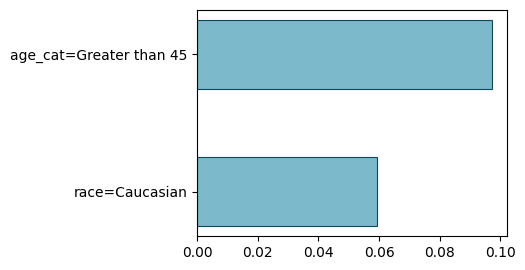

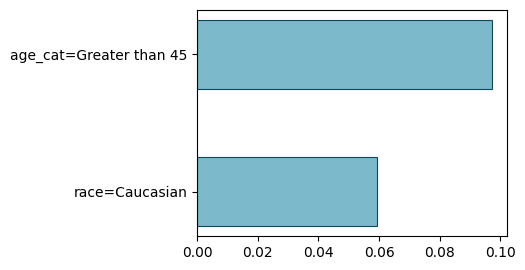

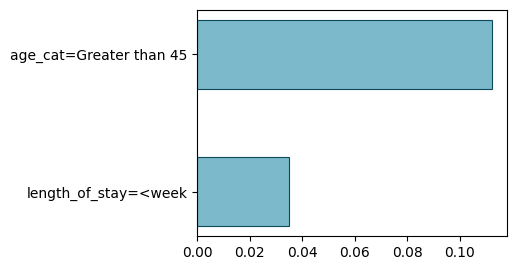

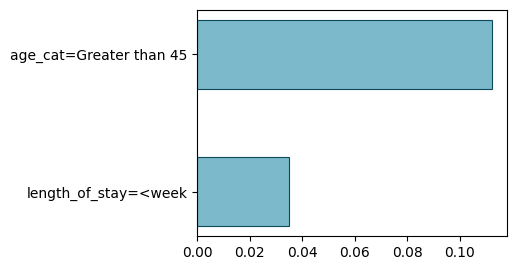

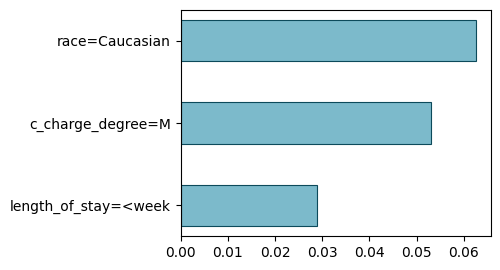

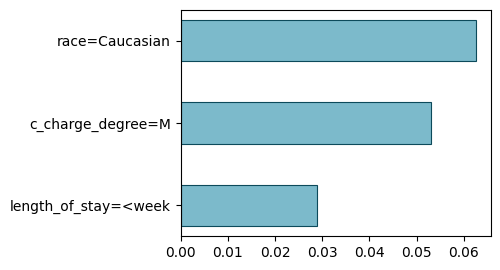

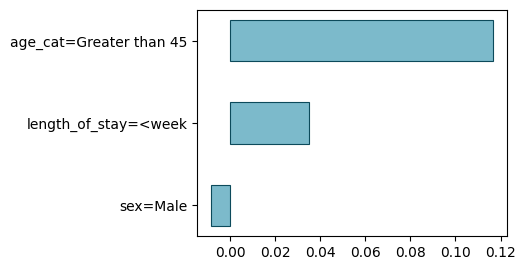

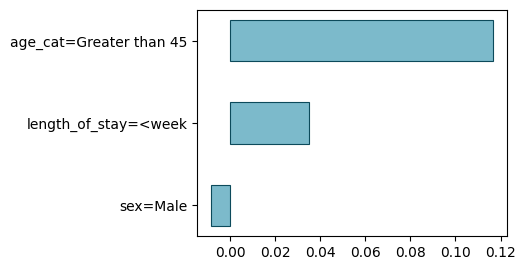

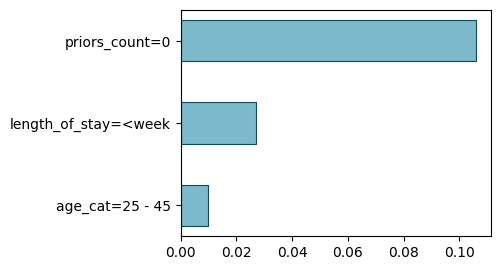

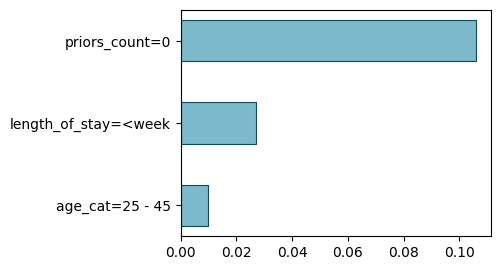

In [88]:
fp_divergence_ofI=fp_divergence_negr
topK_negr=fp_divergence_ofI.getDivergenceTopK(K=5, th_redundancy=0)
for item in topK_negr.keys():
    fp_divergence_ofI.plotShapleyValue(itemset=item)

{frozenset({'race=Caucasian', 'age_cat=Greater than 45'}): 0.15669078765412736}
{frozenset({'race=Caucasian', 'age_cat=Greater than 45'}): 0.15669078765412736}


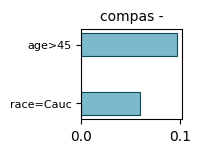

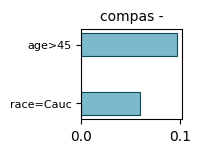

In [89]:
outputName=f"{outDirShap}/{dataset_name}_shap_{fp_divergence_negr.metric_name}_{min_sup}"
itemset_div=fp_divergence_negr.getDivergenceTopK(K=1, th_redundancy=0)
print(itemset_div)
itemset_shap=fp_divergence_negr.computeShapleyValue(list(itemset_div.keys())[0])
fp_divergence_negr.plotShapleyValue(shapley_values=itemset_shap, abbreviations=abbreviations,\
                 height=0.4,\
                 title=f"{dataset_name} -", sizeFig=(1.3,1.2), labelsize=8, saveFig=saveFig, nameFig=outputName)

#### Lattice Explorer

In [90]:
top1=list(fp_divergence_negr.getDivergenceTopK(K=1, th_redundancy=0).keys())[0]
fig1=fp_divergence_negr.plotLatticeItemset(top1, Th_divergence=0.15, sizeDot="small")#, getLower=True)

### Corrective

Given an itemset $I$ and an item $i \not\in I$, we say that $i$ is a *corrective item* for $I$ if 
$|\Delta(I \cup i)|<|\Delta(I)|$.


The *corrective factor* of $i$ w.r.t.\ $I$ is 
$|\Delta(I)| - |\Delta(I \cup i)|$.

In [91]:
#Significant corrective items based on t-value of difference
corrSign=fp_divergence_negr.getCorrectiveItems()
corrSign.head(10)

,item i,S,S+i,v_i,v_S,v_S+i,t_value_corr,corr_factor
402,"(priors_count=[1,3])","(c_charge_degree=F, sex=Male, race=African-American)","(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",0.052664,-0.130551,-0.043679,4.300700,0.086872
258,"(priors_count=[1,3])","(c_charge_degree=F, race=African-American)","(c_charge_degree=F, race=African-American, priors_count=[1,3])",0.052664,-0.113827,-0.027998,4.805927,0.085830
207,"(priors_count=[1,3])","(sex=Male, race=African-American)","(sex=Male, race=African-American, priors_count=[1,3])",0.052664,-0.099110,-0.013986,5.319613,0.085124
73,"(priors_count=[1,3])",(race=African-American),"(race=African-American, priors_count=[1,3])",0.052664,-0.080789,-0.000297,5.704848,0.080492
84,(c_charge_degree=M),(race=African-American),"(c_charge_degree=M, race=African-American)",0.070458,-0.080789,-0.006679,4.965468,0.074109
249,(c_charge_degree=M),"(sex=Male, race=African-American)","(race=African-American, sex=Male, c_charge_degree=M)",0.070458,-0.099110,-0.026039,4.270962,0.073071
391,(race=African-American),"(length_of_stay=<week, c_charge_degree=M, sex=Male)","(race=African-American, length_of_stay=<week, c_charge_degree=M, sex=Male)",-0.080789,0.086197,0.013379,4.305965,0.072818
244,(race=African-American),"(length_of_stay=<week, c_charge_degree=M)","(race=African-American, length_of_stay=<week, c_charge_degree=M)",-0.080789,0.097672,0.030441,4.689109,0.067230
85,(race=African-American),(c_charge_degree=M),"(c_charge_degree=M, race=African-American)",-0.080789,0.070458,-0.006679,5.411749,0.063778
302,(length_of_stay=<week),"(age_cat=Less than 25, race=African-American)","(age_cat=Less than 25, length_of_stay=<week, race=African-American)",0.040040,-0.138503,-0.078647,2.472560,0.059857


,item i,S,S+i,v_i,v_S,v_S+i,t_value_corr,corr_factor
402,"(priors_count=[1,3])","(c_charge_degree=F, sex=Male, race=African-American)","(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",0.052664,-0.130551,-0.043679,4.300700,0.086872
258,"(priors_count=[1,3])","(c_charge_degree=F, race=African-American)","(c_charge_degree=F, race=African-American, priors_count=[1,3])",0.052664,-0.113827,-0.027998,4.805927,0.085830
207,"(priors_count=[1,3])","(sex=Male, race=African-American)","(sex=Male, race=African-American, priors_count=[1,3])",0.052664,-0.099110,-0.013986,5.319613,0.085124
73,"(priors_count=[1,3])",(race=African-American),"(race=African-American, priors_count=[1,3])",0.052664,-0.080789,-0.000297,5.704848,0.080492
84,(c_charge_degree=M),(race=African-American),"(c_charge_degree=M, race=African-American)",0.070458,-0.080789,-0.006679,4.965468,0.074109
249,(c_charge_degree=M),"(sex=Male, race=African-American)","(race=African-American, sex=Male, c_charge_degree=M)",0.070458,-0.099110,-0.026039,4.270962,0.073071
391,(race=African-American),"(length_of_stay=<week, c_charge_degree=M, sex=Male)","(race=African-American, length_of_stay=<week, c_charge_degree=M, sex=Male)",-0.080789,0.086197,0.013379,4.305965,0.072818
244,(race=African-American),"(length_of_stay=<week, c_charge_degree=M)","(race=African-American, length_of_stay=<week, c_charge_degree=M)",-0.080789,0.097672,0.030441,4.689109,0.067230
85,(race=African-American),(c_charge_degree=M),"(c_charge_degree=M, race=African-American)",-0.080789,0.070458,-0.006679,5.411749,0.063778
302,(length_of_stay=<week),"(age_cat=Less than 25, race=African-American)","(age_cat=Less than 25, length_of_stay=<week, race=African-American)",0.040040,-0.138503,-0.078647,2.472560,0.059857


In [92]:
corrSign=fp_divergence_negr.getCorrectiveItems()
corrSignPrint=printableCorrective(corrSign, fp_divergence_negr.metric_name, abbreviations=abbreviations)   
display(corrSignPrint)

,corrective item α,I,NEGR(I),NEGR(I U α),corr_factor,t_corr
402,"#prior=[1,3]","charge=F, race=Afr-Am, sex=Male",-0.131,-0.044,0.087,4.3
258,"#prior=[1,3]","charge=F, race=Afr-Am",-0.114,-0.028,0.086,4.8
207,"#prior=[1,3]","race=Afr-Am, sex=Male",-0.099,-0.014,0.085,5.3
73,"#prior=[1,3]",race=Afr-Am,-0.081,-0.000,0.080,5.7
84,charge=M,race=Afr-Am,-0.081,-0.007,0.074,5.0


,corrective item α,I,NEGR(I),NEGR(I U α),corr_factor,t_corr
402,"#prior=[1,3]","charge=F, race=Afr-Am, sex=Male",-0.131,-0.044,0.087,4.3
258,"#prior=[1,3]","charge=F, race=Afr-Am",-0.114,-0.028,0.086,4.8
207,"#prior=[1,3]","race=Afr-Am, sex=Male",-0.099,-0.014,0.085,5.3
73,"#prior=[1,3]",race=Afr-Am,-0.081,-0.000,0.080,5.7
84,charge=M,race=Afr-Am,-0.081,-0.007,0.074,5.0


Details of $S$ and $S \cup i$ for the top corrective items

In [93]:
d=fp_divergence_negr.getCorrectiveItems()
itemsetsOfI=d[["S", "S+i"]].head(4).values
for S,S_i in itemsetsOfI:
    display(fp_divergence_negr.getInfoItemsets([S,S_i])[colsOfI_1c])

,support,itemsets,P,N,posr,d_posr,negr,d_negr
27,0.297472,"(c_charge_degree=F, sex=Male, race=African-American)",580.0,1256.0,0.315904,0.130551,0.684096,-0.130551
153,0.100454,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",142.0,478.0,0.229032,0.043679,0.770968,-0.043679


,support,itemsets,P,N,posr,d_posr,negr,d_negr
27,0.297472,"(c_charge_degree=F, sex=Male, race=African-American)",580.0,1256.0,0.315904,0.130551,0.684096,-0.130551
153,0.100454,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",142.0,478.0,0.229032,0.043679,0.770968,-0.043679


,support,itemsets,P,N,posr,d_posr,negr,d_negr
17,0.355800,"(c_charge_degree=F, race=African-American)",657.0,1539.0,0.299180,0.113827,0.700820,-0.113827
119,0.123785,"(c_charge_degree=F, race=African-American, priors_count=[1,3])",163.0,601.0,0.213351,0.027998,0.786649,-0.027998


,support,itemsets,P,N,posr,d_posr,negr,d_negr
17,0.355800,"(c_charge_degree=F, race=African-American)",657.0,1539.0,0.299180,0.113827,0.700820,-0.113827
119,0.123785,"(c_charge_degree=F, race=African-American, priors_count=[1,3])",163.0,601.0,0.213351,0.027998,0.786649,-0.027998


,support,itemsets,P,N,posr,d_posr,negr,d_negr
11,0.425470,"(sex=Male, race=African-American)",747.0,1879.0,0.284463,0.099110,0.715537,-0.099110
89,0.147116,"(sex=Male, race=African-American, priors_count=[1,3])",181.0,727.0,0.199339,0.013986,0.800661,-0.013986


,support,itemsets,P,N,posr,d_posr,negr,d_negr
11,0.425470,"(sex=Male, race=African-American)",747.0,1879.0,0.284463,0.099110,0.715537,-0.099110
89,0.147116,"(sex=Male, race=African-American, priors_count=[1,3])",181.0,727.0,0.199339,0.013986,0.800661,-0.013986


,support,itemsets,P,N,posr,d_posr,negr,d_negr
7,0.514420,(race=African-American),845.0,2330.0,0.266142,0.080789,0.733858,-0.080789
63,0.180655,"(race=African-American, priors_count=[1,3])",207.0,908.0,0.185650,0.000297,0.814350,-0.000297


,support,itemsets,P,N,posr,d_posr,negr,d_negr
7,0.514420,(race=African-American),845.0,2330.0,0.266142,0.080789,0.733858,-0.080789
63,0.180655,"(race=African-American, priors_count=[1,3])",207.0,908.0,0.185650,0.000297,0.814350,-0.000297


#### Plot Shapley comparison corrective

In [94]:
fp_divergence_ofI=fp_divergence_negr
corrSign=fp_divergence_ofI.getCorrectiveItems()
id_col=0
if len(corrSign)>0:
    S,S_i=corrSign[["S", "S+i"]].values[id_col].tolist()
    display(fp_divergence_ofI.getInfoItemsets([S,S_i])[colsOfI_1c])

,support,itemsets,P,N,posr,d_posr,negr,d_negr
27,0.297472,"(c_charge_degree=F, sex=Male, race=African-American)",580.0,1256.0,0.315904,0.130551,0.684096,-0.130551
153,0.100454,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",142.0,478.0,0.229032,0.043679,0.770968,-0.043679


,support,itemsets,P,N,posr,d_posr,negr,d_negr
27,0.297472,"(c_charge_degree=F, sex=Male, race=African-American)",580.0,1256.0,0.315904,0.130551,0.684096,-0.130551
153,0.100454,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",142.0,478.0,0.229032,0.043679,0.770968,-0.043679


,support,itemsets,P,N,posr,d_posr,negr,d_negr
27,0.297472,"(c_charge_degree=F, sex=Male, race=African-American)",580.0,1256.0,0.315904,0.130551,0.684096,-0.130551
153,0.100454,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",142.0,478.0,0.229032,0.043679,0.770968,-0.043679


,support,itemsets,P,N,posr,d_posr,negr,d_negr
27,0.297472,"(c_charge_degree=F, sex=Male, race=African-American)",580.0,1256.0,0.315904,0.130551,0.684096,-0.130551
153,0.100454,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",142.0,478.0,0.229032,0.043679,0.770968,-0.043679


∇NEGR(S):-0.131 -->  ∇NEGR(S U i):-0.044
∇NEGR(S):-0.131 -->  ∇NEGR(S U i):-0.044


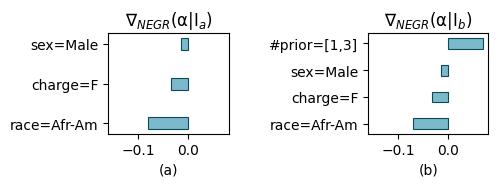

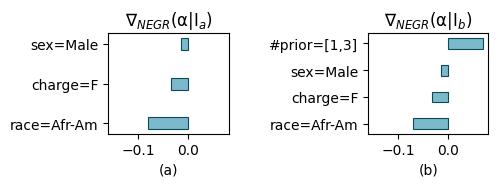

In [95]:
id_col=0

fp_divergence_ofI=fp_divergence_negr
corrSign=fp_divergence_ofI.getCorrectiveItems()

if len(corrSign)>id_col:
    outputName=f"{outDirShap}/{dataset_name}_shap_corrective_{fp_divergence_ofI.metric_name}_{min_sup}"
    S,S_i, v_S, v_Si=corrSign[["S", "S+i", "v_S", "v_S+i"]].head(id_col+1).values[id_col].tolist()
    display(fp_divergence_ofI.getInfoItemsets([S,S_i])[colsOfI_1c])
    shap_itemset1=abbreviateDict(fp_divergence_ofI.computeShapleyValue(S), abbreviations)
    shap_itemset2=abbreviateDict(fp_divergence_ofI.computeShapleyValue(S_i), abbreviations)
    id1, id2="$_a$", "$_b$" #"",""
    t1, t2=f"$∇_{{{fp_divergence_ofI.metric_name}}}$(α|I{id1})", f"$∇_{{{fp_divergence_ofI.metric_name}}}$(α|I{id2})"
    print(f"∇{fp_divergence_ofI.metric_name}(S):{round(v_S,3)} -->  ∇{fp_divergence_ofI.metric_name}(S U i):{round(v_Si,3)}")

    plotComparisonShapleyValues(shap_itemset1, shap_itemset2, height=[0.3, 0.4], sharedAxis=True, \
                        sizeFig=(5.2, 1.9), title=[t1,t2], saveFig=saveFig, nameFig=outputName, pad=1.5,\
                               metrics_name=[fp_divergence_ofI.metric_name, fp_divergence_ofI.metric_name])

#### Lattice

In [96]:
id_col=0
fp_divergence_ofI=fp_divergence_negr
corrSign=fp_divergence_ofI.getCorrectiveItems()
if len(corrSign)>id_col:
    S, S_i=corrSign[["S", "S+i"]].head(id_col+1).values[id_col]
    display(fp_divergence_ofI.getInfoItemsets([S, S_i])[colsOfI_1c])
    #S_i=corrSign[["S+i"]].head(id_col+1).values[id_col][0]
    print(S_i)
    fig1=fp_divergence_ofI.plotLatticeItemset(S_i, Th_divergence=0.15, sizeDot="small", getLower=True)
    if saveFig:
        fig1.write_image(f"{outDirLattice}/lattice_corrective_{dataset_name}_{fp_divergence_ofI.metric_name}_{min_sup}.pdf")

,support,itemsets,P,N,posr,d_posr,negr,d_negr
27,0.297472,"(c_charge_degree=F, sex=Male, race=African-American)",580.0,1256.0,0.315904,0.130551,0.684096,-0.130551
153,0.100454,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",142.0,478.0,0.229032,0.043679,0.770968,-0.043679


frozenset({'c_charge_degree=F', 'sex=Male', 'race=African-American', 'priors_count=[1,3]'})


,support,itemsets,P,N,posr,d_posr,negr,d_negr
27,0.297472,"(c_charge_degree=F, sex=Male, race=African-American)",580.0,1256.0,0.315904,0.130551,0.684096,-0.130551
153,0.100454,"(c_charge_degree=F, sex=Male, race=African-American, priors_count=[1,3])",142.0,478.0,0.229032,0.043679,0.770968,-0.043679


frozenset({'c_charge_degree=F', 'sex=Male', 'race=African-American', 'priors_count=[1,3]'})


## For interactive analysis

In [97]:
selectItemsInteractive(fp_divergence_negr)

Button(description='Select items', style=ButtonStyle())

Button(description='Select items', style=ButtonStyle())

# Global

In [98]:
saveFig=False
outDirGlobal="./results/figures/global"
if saveFig:
    createDir(outDirGlobal)

## FNR

In [99]:
u_h_fnr=fp_divergence_fnr.computeGlobalShapleyValue()

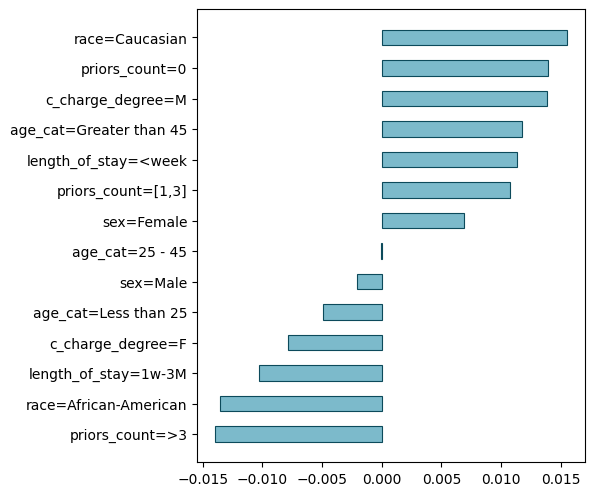

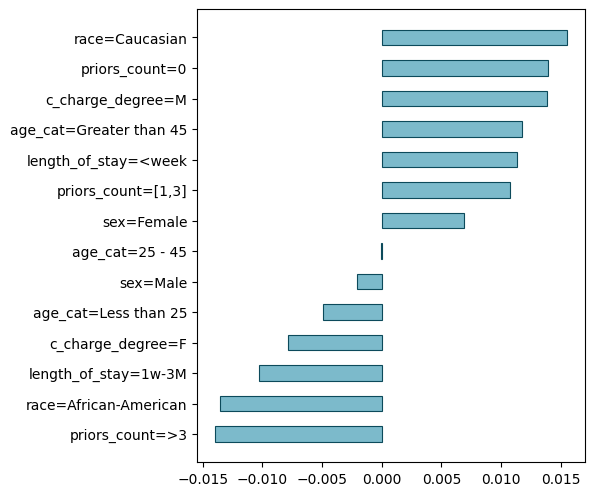

In [100]:
fp_divergence_fnr.plotShapleyValue(shapley_values=u_h_fnr, sizeFig=(5,6))

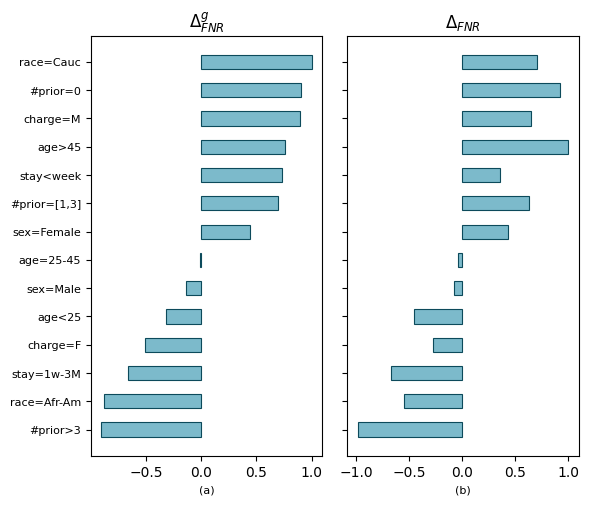

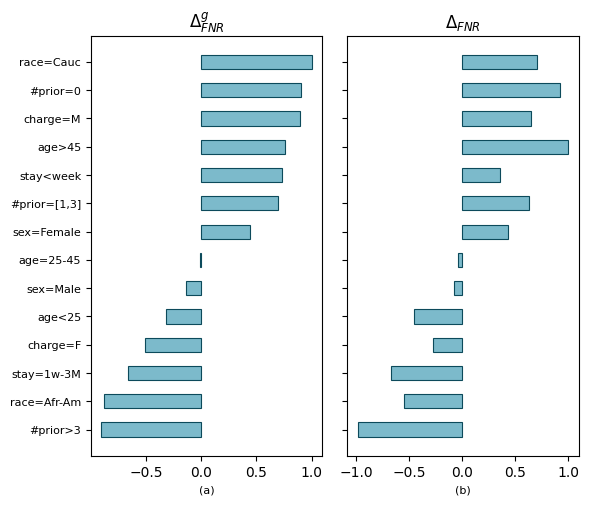

In [101]:
compareShapleyValues(normalizeMax(abbreviateDict(u_h_fnr, abbreviations)), 
                     normalizeMax(abbreviateDict(fp_divergence_fnr.getFItemsetsDivergence()[1], abbreviations)) , \
                     title=["$\Delta^g_{FNR}$", "$\Delta_{FNR}$"], \
                      labelsize=8, height=0.5, sizeFig=(6,5), \
                     saveFig=saveFig, subcaption=True,\
                     nameFig=f"{outDirGlobal}/{dataset_name}_FNR_shap_gl_compare_{min_sup}")

## FPR

In [102]:
u_h_fpr=fp_divergence_fpr.computeGlobalShapleyValue()

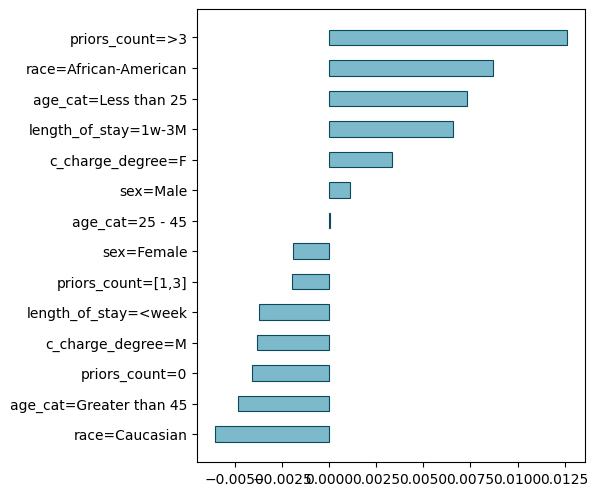

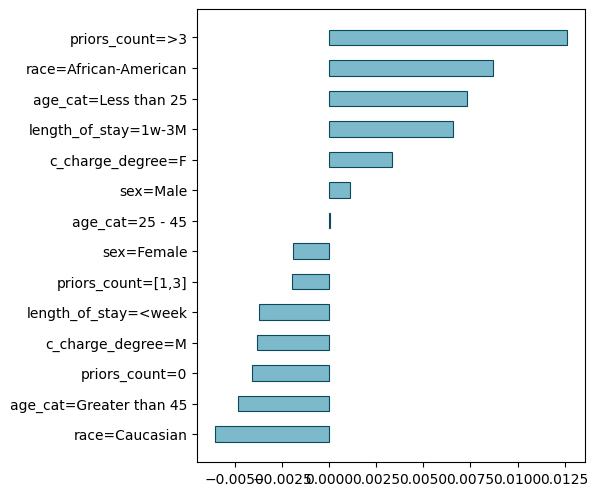

In [103]:
fp_divergence_fpr.plotShapleyValue(shapley_values=u_h_fpr,sizeFig=(5,6))

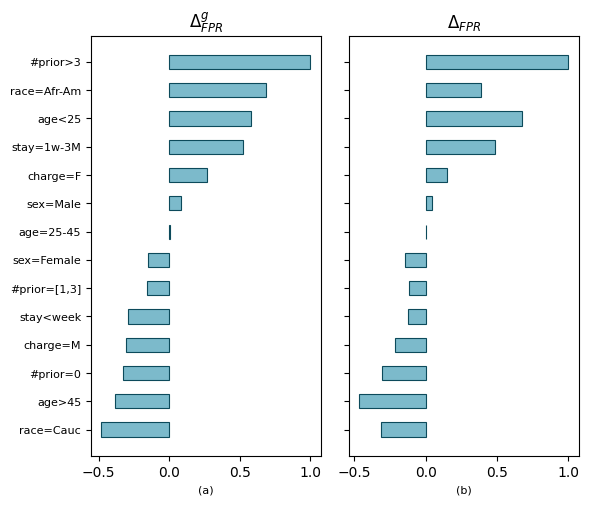

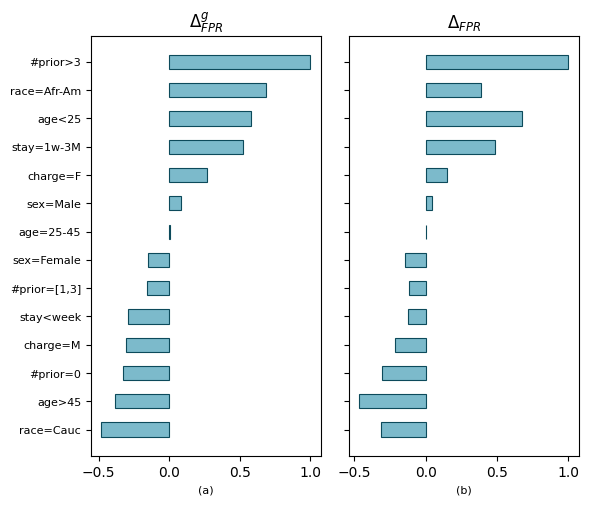

In [104]:
compareShapleyValues(normalizeMax(abbreviateDict(u_h_fpr, abbreviations)),\
                     normalizeMax(abbreviateDict(fp_divergence_fpr.getFItemsetsDivergence()[1], abbreviations)), \
                     title=["$\Delta^g_{FPR}$", "$\Delta_{FPR}$"], \
                      labelsize=8, height=0.5, sizeFig=(6,5),\
                     saveFig=saveFig, subcaption=True,\
                     nameFig=f"{outDirGlobal}/{dataset_name}_FPR_shap_gl_compare_{min_sup}")

## Accuracy

In [105]:
u_h_acc=fp_divergence_acc.computeGlobalShapleyValue()

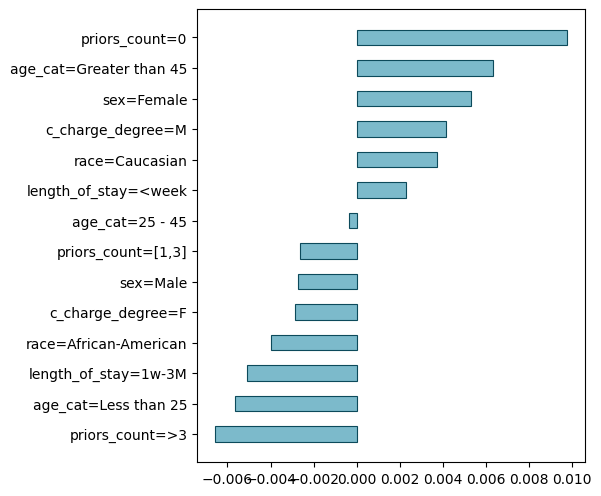

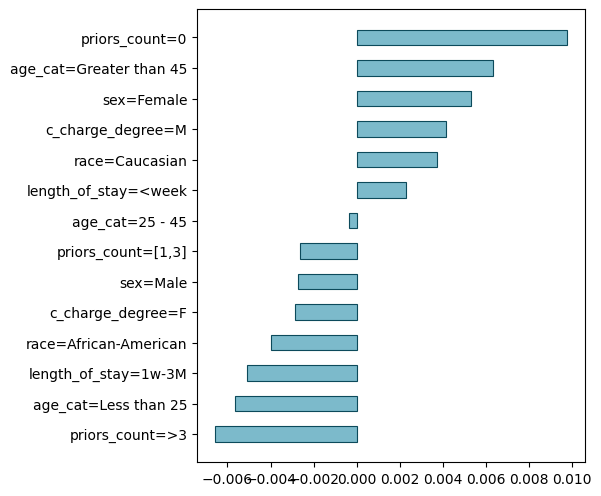

In [106]:
fp_divergence_acc.plotShapleyValue(shapley_values=u_h_acc,  sizeFig=(5,6))

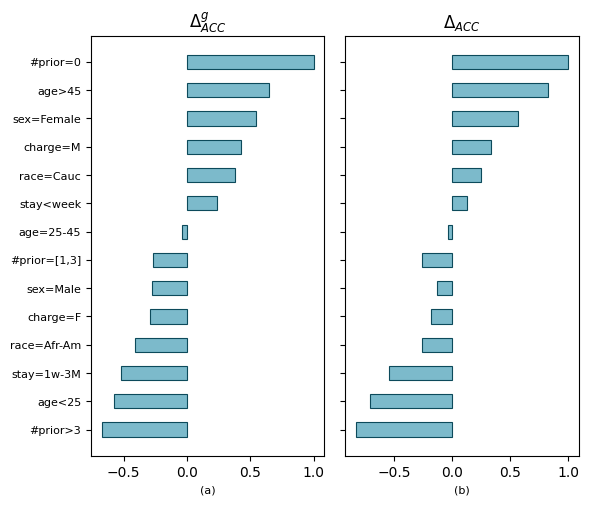

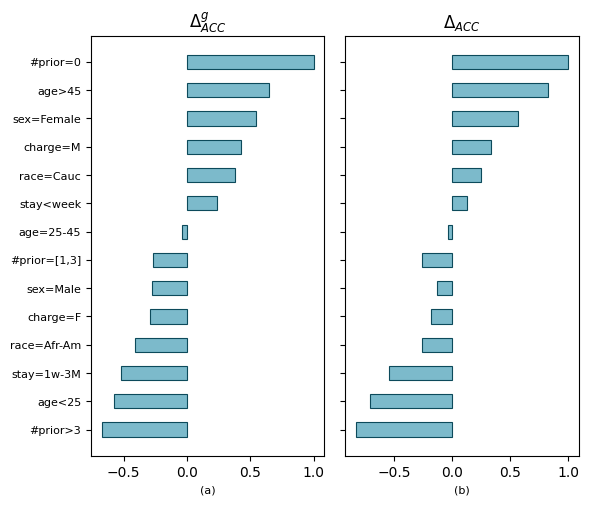

In [107]:
compareShapleyValues(normalizeMax(abbreviateDict(u_h_acc, abbreviations)),\
                     normalizeMax(abbreviateDict(fp_divergence_acc.getFItemsetsDivergence()[1], abbreviations)), \
                     title=["$\Delta^g_{ACC}$", "$\Delta_{ACC}$"], \
                      labelsize=8, height=0.5, sizeFig=(6,5),\
                     saveFig=saveFig, subcaption=True,\
                     nameFig=f"{outDirGlobal}/{dataset_name}_ACC_shap_gl_compare_{min_sup}")

## Compare FPR,FNR

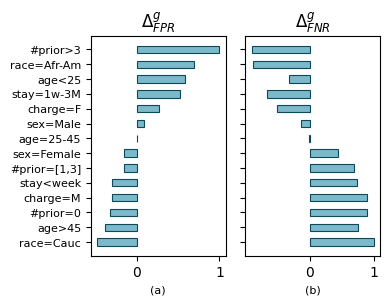

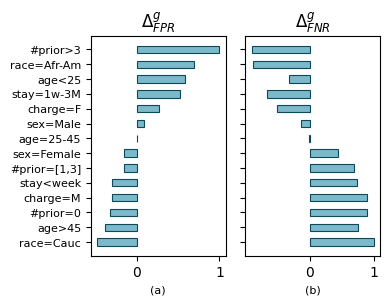

In [108]:
compareShapleyValues(normalizeMax(abbreviateDict(u_h_fpr, abbreviations)), normalizeMax(abbreviateDict(u_h_fnr, abbreviations)), \
                     title=[f"$\Delta^g_{{{fp_divergence_fpr.metric_name}}}$", f"$\Delta^g_{{{fp_divergence_fnr.metric_name}}}$"], \
                      labelsize=8, height=0.5, sizeFig=(4,3), \
                     saveFig=saveFig, subcaption=True,\
                     nameFig=f"{outDirGlobal}/{dataset_name}_FPR_FNR_shap_gl_compare_{min_sup}")

## Top K Global plot

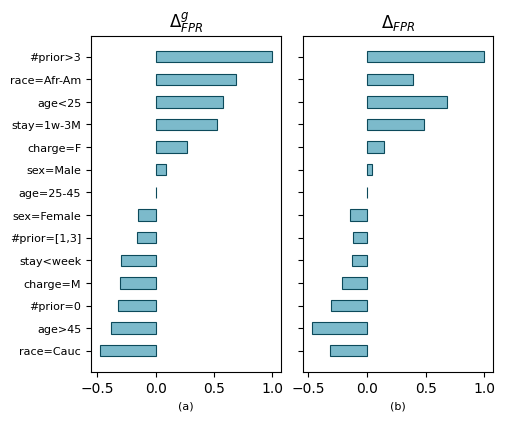

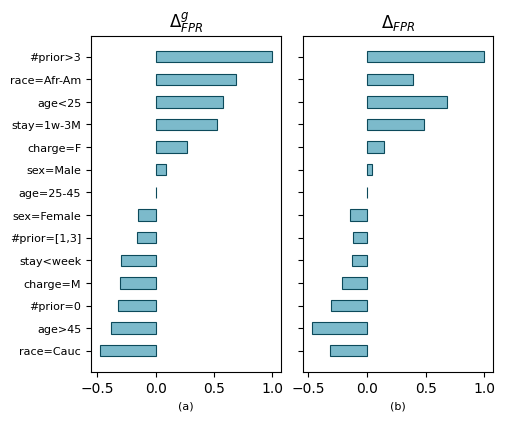

In [109]:
K=25
topK_global={k:v for k,v in u_h_fpr.items() if k in sorted(u_h_fpr, key=lambda x: abs(u_h_fpr[x]))[::-1][:K]}
topK_I_len1={k:v for k,v in fp_divergence_fpr.getFItemsetsDivergence()[1].items() if k in topK_global.keys()}

compareShapleyValues(normalizeMax(abbreviateDict(topK_global, abbreviations)),\
                     normalizeMax(abbreviateDict(topK_I_len1, abbreviations)), \
                     title=["$\Delta^g_{FPR}$", "$\Delta_{FPR}$"], \
                      labelsize=8, height=0.5, sizeFig=(5,4),\
                     saveFig=saveFig, subcaption=True,\
                     pad=0.5,\
                     nameFig=f"{outDirGlobal}/{dataset_name}_FPR_shap_gl_compare_{min_sup}_top{K}")

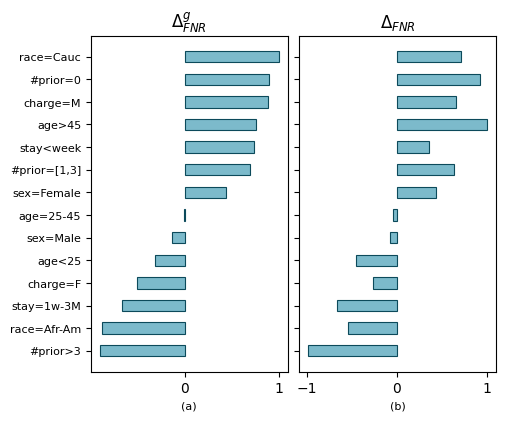

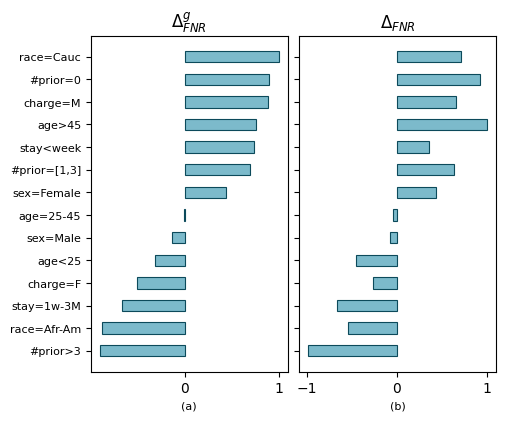

In [110]:
K=25
topK_global={k:v for k,v in u_h_fnr.items() if k in sorted(u_h_fnr, key=lambda x: abs(u_h_fnr[x]))[::-1][:K]}
topK_I_len1={k:v for k,v in fp_divergence_fnr.getFItemsetsDivergence()[1].items() if k in topK_global.keys()}
compareShapleyValues(normalizeMax(abbreviateDict(topK_global, abbreviations)),\
                     normalizeMax(abbreviateDict(topK_I_len1, abbreviations)), \
                     title=["$\Delta^g_{FNR}$", "$\Delta_{FNR}$"], \
                      labelsize=8, height=0.5, sizeFig=(5,4),\
                     saveFig=saveFig, subcaption=True,\
                     pad=0.5,\
                     nameFig=f"{outDirGlobal}/{dataset_name}_FNR_shap_gl_compare_{min_sup}_top{K}")

# Formatted

## TopK

### Threshold redundancy=0

In [111]:
n_rows=5

In [112]:
div_fpr=fp_divergence_fpr.getDivergence(th_redundancy=0)[["support", "itemsets",  fp_divergence_fpr.metric, fp_divergence_fpr.t_value_col]]
div_pr_fpr=printable(div_fpr.head(n_rows), abbreviations=abbreviations)
div_fnr=fp_divergence_fnr.getDivergence(th_redundancy=0)[["support", "itemsets",  fp_divergence_fnr.metric, fp_divergence_fnr.t_value_col]]
div_pr_fnr=printable(div_fnr.head(n_rows), abbreviations=abbreviations)
d_h=fp_divergence_acc.getDivergence(absF=True)[["support", "itemsets",  fp_divergence_acc.metric, fp_divergence_acc.t_value_col]]
div_acc_h=d_h.loc[d_h.d_accuracy>0]
div_acc_h_pr=printable(div_acc_h.head(2), abbreviations=abbreviations)
d_lower=fp_divergence_acc.getDivergence(absF=True)[["support", "itemsets",  fp_divergence_acc.metric, fp_divergence_acc.t_value_col]]
div_acc_l=d_lower.loc[d_lower.d_accuracy<0]
div_acc_l_pr=printable(div_acc_l.head(2), abbreviations=abbreviations)

In [113]:
dfs=[div_pr_fpr, div_pr_fnr, div_acc_h_pr.append(div_acc_l_pr)]
div_all=printableAll(dfs)
display(div_all)

print(div_all.to_latex(index=False))

/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/3197146500.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/eliana/Projects/divexplorer/notebooks/utils_print.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/eliana/Projects/divexplorer/notebooks/utils_print.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/eliana/Projects/divexplorer/notebooks/utils_print.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,itemsets,sup,FPR,t_fp
1,"age=25-45, #prior>3, race=Afr-Am, sex=Male",0.13,0.22,7.1
2,"age=25-45, #prior>3, race=Afr-Am",0.15,0.211,7.4
3,"age=25-45, charge=F, #prior>3, race=Afr-Am",0.11,0.202,6.2
4,"charge=F, #prior>3, race=Afr-Am, sex=Male",0.13,0.18,6.1
5,"#prior>3, race=Afr-Am, sex=Male",0.18,0.179,7.2
6,itemsets,sup,FNR,t_fn
7,"age=25-45, stay<week, #prior=0",0.15,0.236,12.1
8,"charge=M, stay<week, #prior=[1,3]",0.1,0.233,12.2
9,"age>45, race=Cauc",0.1,0.231,10.3
10,"age=25-45, stay<week, #prior=0, sex=Male",0.11,0.228,9.9


/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/3197146500.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/eliana/Projects/divexplorer/notebooks/utils_print.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/eliana/Projects/divexplorer/notebooks/utils_print.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/eliana/Projects/divexplorer/notebooks/utils_print.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,itemsets,sup,FPR,t_fp
1,"age=25-45, #prior>3, race=Afr-Am, sex=Male",0.13,0.22,7.1
2,"age=25-45, #prior>3, race=Afr-Am",0.15,0.211,7.4
3,"age=25-45, charge=F, #prior>3, race=Afr-Am",0.11,0.202,6.2
4,"charge=F, #prior>3, race=Afr-Am, sex=Male",0.13,0.18,6.1
5,"#prior>3, race=Afr-Am, sex=Male",0.18,0.179,7.2
6,itemsets,sup,FNR,t_fn
7,"age=25-45, stay<week, #prior=0",0.15,0.236,12.1
8,"charge=M, stay<week, #prior=[1,3]",0.1,0.233,12.2
9,"age>45, race=Cauc",0.1,0.231,10.3
10,"age=25-45, stay<week, #prior=0, sex=Male",0.11,0.228,9.9


\begin{tabular}{llll}
\toprule
                                  itemsets &   sup &    FPR &    t\_fp \\
\midrule
age=25-45, \#prior>3, race=Afr-Am, sex=Male &  0.13 &   0.22 &     7.1 \\
          age=25-45, \#prior>3, race=Afr-Am &  0.15 &  0.211 &     7.4 \\
age=25-45, charge=F, \#prior>3, race=Afr-Am &  0.11 &  0.202 &     6.2 \\
 charge=F, \#prior>3, race=Afr-Am, sex=Male &  0.13 &   0.18 &     6.1 \\
           \#prior>3, race=Afr-Am, sex=Male &  0.18 &  0.179 &     7.2 \\
                                  itemsets &   sup &    FNR &    t\_fn \\
            age=25-45, stay<week, \#prior=0 &  0.15 &  0.236 &    12.1 \\
         charge=M, stay<week, \#prior=[1,3] &   0.1 &  0.233 &    12.2 \\
                         age>45, race=Cauc &   0.1 &  0.231 &    10.3 \\
  age=25-45, stay<week, \#prior=0, sex=Male &  0.11 &  0.228 &     9.9 \\
            charge=M, stay<week, race=Cauc &  0.12 &  0.228 &    11.2 \\
                                  itemsets &   sup &    ACC & t\_tp\_tn \\

/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/3197146500.py:5: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



\begin{tabular}{llll}
\toprule
                                  itemsets &   sup &    FPR &    t\_fp \\
\midrule
age=25-45, \#prior>3, race=Afr-Am, sex=Male &  0.13 &   0.22 &     7.1 \\
          age=25-45, \#prior>3, race=Afr-Am &  0.15 &  0.211 &     7.4 \\
age=25-45, charge=F, \#prior>3, race=Afr-Am &  0.11 &  0.202 &     6.2 \\
 charge=F, \#prior>3, race=Afr-Am, sex=Male &  0.13 &   0.18 &     6.1 \\
           \#prior>3, race=Afr-Am, sex=Male &  0.18 &  0.179 &     7.2 \\
                                  itemsets &   sup &    FNR &    t\_fn \\
            age=25-45, stay<week, \#prior=0 &  0.15 &  0.236 &    12.1 \\
         charge=M, stay<week, \#prior=[1,3] &   0.1 &  0.233 &    12.2 \\
                         age>45, race=Cauc &   0.1 &  0.231 &    10.3 \\
  age=25-45, stay<week, \#prior=0, sex=Male &  0.11 &  0.228 &     9.9 \\
            charge=M, stay<week, race=Cauc &  0.12 &  0.228 &    11.2 \\
                                  itemsets &   sup &    ACC & t\_tp\_tn \\

/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/3197146500.py:5: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



### Threshold redundancy=0.01

In [114]:
th_redundancy=0.05
n_rows=3

In [115]:
div_fpr=fp_divergence_fpr.getDivergence(th_redundancy=th_redundancy)[["support", "itemsets",  fp_divergence_fpr.metric, fp_divergence_fpr.t_value_col]]
div_pr_fpr=printable(div_fpr.head(n_rows), abbreviations=abbreviations)
div_fnr=fp_divergence_fnr.getDivergence(th_redundancy=th_redundancy)[["support", "itemsets",  fp_divergence_fnr.metric, fp_divergence_fnr.t_value_col]]
div_pr_fnr=printable(div_fnr.head(n_rows), abbreviations=abbreviations)
d_h=fp_divergence_acc.getDivergence(absF=True, th_redundancy=th_redundancy)[["support", "itemsets",  fp_divergence_acc.metric, fp_divergence_acc.t_value_col]]
div_acc_h=d_h.loc[d_h.d_accuracy>0]
div_acc_h_pr=printable(div_acc_h.head(2), abbreviations=abbreviations)
d_lower=fp_divergence_acc.getDivergence(absF=True, th_redundancy=th_redundancy)[["support", "itemsets",  fp_divergence_acc.metric, fp_divergence_acc.t_value_col]]
div_acc_l=d_lower.loc[d_lower.d_accuracy<0]
div_acc_l_pr=printable(div_acc_l.head(2), abbreviations=abbreviations)

In [116]:
dfs=[div_pr_fpr, div_pr_fnr, div_acc_h_pr.append(div_acc_l_pr)]
div_all=printableAll(dfs)
display(div_all)

print(div_all.to_latex(index=False))

/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/3197146500.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/eliana/Projects/divexplorer/notebooks/utils_print.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/eliana/Projects/divexplorer/notebooks/utils_print.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/eliana/Projects/divexplorer/notebooks/utils_print.py:74: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/3197146500.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future versio

,itemsets,sup,FPR,t_fp
1,#prior>3,0.29,0.131,7.5
2,age<25,0.22,0.089,5.5
3,stay=1w-3M,0.18,0.063,3.7
4,itemsets,sup,FNR,t_fn
5,"age=25-45, stay<week, #prior=0",0.15,0.236,12.1
6,"charge=M, stay<week, #prior=[1,3]",0.1,0.233,12.2
7,"age>45, race=Cauc",0.1,0.231,10.3
8,itemsets,sup,ACC,t_tp_tn
9,#prior=0,0.34,0.093,8.0
10,age>45,0.21,0.077,5.5


,itemsets,sup,FPR,t_fp
1,#prior>3,0.29,0.131,7.5
2,age<25,0.22,0.089,5.5
3,stay=1w-3M,0.18,0.063,3.7
4,itemsets,sup,FNR,t_fn
5,"age=25-45, stay<week, #prior=0",0.15,0.236,12.1
6,"charge=M, stay<week, #prior=[1,3]",0.1,0.233,12.2
7,"age>45, race=Cauc",0.1,0.231,10.3
8,itemsets,sup,ACC,t_tp_tn
9,#prior=0,0.34,0.093,8.0
10,age>45,0.21,0.077,5.5


\begin{tabular}{llll}
\toprule
                         itemsets &   sup &    FPR &    t\_fp \\
\midrule
                         \#prior>3 &  0.29 &  0.131 &     7.5 \\
                           age<25 &  0.22 &  0.089 &     5.5 \\
                       stay=1w-3M &  0.18 &  0.063 &     3.7 \\
                         itemsets &   sup &    FNR &    t\_fn \\
   age=25-45, stay<week, \#prior=0 &  0.15 &  0.236 &    12.1 \\
charge=M, stay<week, \#prior=[1,3] &   0.1 &  0.233 &    12.2 \\
                age>45, race=Cauc &   0.1 &  0.231 &    10.3 \\
                         itemsets &   sup &    ACC & t\_tp\_tn \\
                         \#prior=0 &  0.34 &  0.093 &     8.0 \\
                           age>45 &  0.21 &  0.077 &     5.5 \\
                         \#prior>3 &  0.29 & -0.077 &     5.8 \\
                           age<25 &  0.22 & -0.065 &     4.4 \\
\bottomrule
\end{tabular}



/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/3197146500.py:5: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



\begin{tabular}{llll}
\toprule
                         itemsets &   sup &    FPR &    t\_fp \\
\midrule
                         \#prior>3 &  0.29 &  0.131 &     7.5 \\
                           age<25 &  0.22 &  0.089 &     5.5 \\
                       stay=1w-3M &  0.18 &  0.063 &     3.7 \\
                         itemsets &   sup &    FNR &    t\_fn \\
   age=25-45, stay<week, \#prior=0 &  0.15 &  0.236 &    12.1 \\
charge=M, stay<week, \#prior=[1,3] &   0.1 &  0.233 &    12.2 \\
                age>45, race=Cauc &   0.1 &  0.231 &    10.3 \\
                         itemsets &   sup &    ACC & t\_tp\_tn \\
                         \#prior=0 &  0.34 &  0.093 &     8.0 \\
                           age>45 &  0.21 &  0.077 &     5.5 \\
                         \#prior>3 &  0.29 & -0.077 &     5.8 \\
                           age<25 &  0.22 & -0.065 &     4.4 \\
\bottomrule
\end{tabular}



/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/3197146500.py:5: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



## Corrective

### FPR

In [117]:
corrSign=fp_divergence_fpr.getCorrectiveItems()
corrSignPrint=printableCorrective(corrSign.head(3), fp_divergence_fpr.metric_name, abbreviations=abbreviations)   
display(corrSignPrint)
print(corrSignPrint.to_latex(index=False))

,corrective item α,I,FPR(I),FPR(I U α),corr_factor,t_corr
291,#prior=0,"race=Afr-Am, sex=Male",0.062,0.009,0.053,2.8
97,#prior=0,race=Afr-Am,0.051,-0.001,0.051,3.4
260,race=Afr-Am,"stay<week, #prior=0",-0.044,-0.003,0.041,3.1


,corrective item α,I,FPR(I),FPR(I U α),corr_factor,t_corr
291,#prior=0,"race=Afr-Am, sex=Male",0.062,0.009,0.053,2.8
97,#prior=0,race=Afr-Am,0.051,-0.001,0.051,3.4
260,race=Afr-Am,"stay<week, #prior=0",-0.044,-0.003,0.041,3.1


\begin{tabular}{llrrrr}
\toprule
corrective item α &                     I &  FPR(I) &  FPR(I U α) &  corr\_factor &  t\_corr \\
\midrule
         \#prior=0 & race=Afr-Am, sex=Male &   0.062 &       0.009 &        0.053 &     2.8 \\
         \#prior=0 &           race=Afr-Am &   0.051 &      -0.001 &        0.051 &     3.4 \\
      race=Afr-Am &   stay<week, \#prior=0 &  -0.044 &      -0.003 &        0.041 &     3.1 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrr}
\toprule
corrective item α &                     I &  FPR(I) &  FPR(I U α) &  corr\_factor &  t\_corr \\
\midrule
         \#prior=0 & race=Afr-Am, sex=Male &   0.062 &       0.009 &        0.053 &     2.8 \\
         \#prior=0 &           race=Afr-Am &   0.051 &      -0.001 &        0.051 &     3.4 \\
      race=Afr-Am &   stay<week, \#prior=0 &  -0.044 &      -0.003 &        0.041 &     3.1 \\
\bottomrule
\end{tabular}



/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/3793131234.py:4: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.

/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/3793131234.py:4: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



### FNR

In [118]:
corrSign=fp_divergence_fnr.getCorrectiveItems()
corrSignPrint=printableCorrective(corrSign.head(3), fp_divergence_fnr.metric_name, abbreviations=abbreviations)   
display(corrSignPrint)
print(corrSignPrint.to_latex(index=False))

,corrective item α,I,FNR(I),FNR(I U α),corr_factor,t_corr
402,"#prior=[1,3]","charge=F, race=Afr-Am, sex=Male",-0.123,-0.011,0.112,3.8
258,"#prior=[1,3]","charge=F, race=Afr-Am",-0.113,0.004,0.109,4.3
249,charge=M,"race=Afr-Am, sex=Male",-0.090,-0.001,0.089,3.3


,corrective item α,I,FNR(I),FNR(I U α),corr_factor,t_corr
402,"#prior=[1,3]","charge=F, race=Afr-Am, sex=Male",-0.123,-0.011,0.112,3.8
258,"#prior=[1,3]","charge=F, race=Afr-Am",-0.113,0.004,0.109,4.3
249,charge=M,"race=Afr-Am, sex=Male",-0.090,-0.001,0.089,3.3


\begin{tabular}{llrrrr}
\toprule
corrective item α &                               I &  FNR(I) &  FNR(I U α) &  corr\_factor &  t\_corr \\
\midrule
     \#prior=[1,3] & charge=F, race=Afr-Am, sex=Male &  -0.123 &      -0.011 &        0.112 &     3.8 \\
     \#prior=[1,3] &           charge=F, race=Afr-Am &  -0.113 &       0.004 &        0.109 &     4.3 \\
         charge=M &           race=Afr-Am, sex=Male &  -0.090 &      -0.001 &        0.089 &     3.3 \\
\bottomrule
\end{tabular}



/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/3326381122.py:4: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



\begin{tabular}{llrrrr}
\toprule
corrective item α &                               I &  FNR(I) &  FNR(I U α) &  corr\_factor &  t\_corr \\
\midrule
     \#prior=[1,3] & charge=F, race=Afr-Am, sex=Male &  -0.123 &      -0.011 &        0.112 &     3.8 \\
     \#prior=[1,3] &           charge=F, race=Afr-Am &  -0.113 &       0.004 &        0.109 &     4.3 \\
         charge=M &           race=Afr-Am, sex=Male &  -0.090 &      -0.001 &        0.089 &     3.3 \\
\bottomrule
\end{tabular}



/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/3326381122.py:4: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



### Accuracy

In [119]:
corrSign=fp_divergence_acc.getCorrectiveItems()
corrSignPrint=printableCorrective(corrSign.head(3), fp_divergence_acc.metric_name, abbreviations=abbreviations)   
display(corrSignPrint)
print(corrSignPrint.to_latex(index=False))

,corrective item α,I,ACCURACY(I),ACCURACY(I U α),corr_factor,t_corr
290,race=Afr-Am,"#prior=0, sex=Male",0.077,0.015,0.061,2.8
260,race=Afr-Am,"stay<week, #prior=0",0.101,0.043,0.058,3.0
96,race=Afr-Am,#prior=0,0.093,0.040,0.053,2.8


,corrective item α,I,ACCURACY(I),ACCURACY(I U α),corr_factor,t_corr
290,race=Afr-Am,"#prior=0, sex=Male",0.077,0.015,0.061,2.8
260,race=Afr-Am,"stay<week, #prior=0",0.101,0.043,0.058,3.0
96,race=Afr-Am,#prior=0,0.093,0.040,0.053,2.8


/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/734578658.py:4: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.

/var/folders/1t/9km2pgcx2_54jq76qsqtpqlr0000gp/T/ipykernel_11478/734578658.py:4: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



\begin{tabular}{llrrrr}
\toprule
corrective item α &                   I &  ACCURACY(I) &  ACCURACY(I U α) &  corr\_factor &  t\_corr \\
\midrule
      race=Afr-Am &  \#prior=0, sex=Male &        0.077 &            0.015 &        0.061 &     2.8 \\
      race=Afr-Am & stay<week, \#prior=0 &        0.101 &            0.043 &        0.058 &     3.0 \\
      race=Afr-Am &            \#prior=0 &        0.093 &            0.040 &        0.053 &     2.8 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrr}
\toprule
corrective item α &                   I &  ACCURACY(I) &  ACCURACY(I U α) &  corr\_factor &  t\_corr \\
\midrule
      race=Afr-Am &  \#prior=0, sex=Male &        0.077 &            0.015 &        0.061 &     2.8 \\
      race=Afr-Am & stay<week, \#prior=0 &        0.101 &            0.043 &        0.058 &     3.0 \\
      race=Afr-Am &            \#prior=0 &        0.093 &            0.040 &        0.053 &     2.8 \\
\bottomrule
\end{tabular}

